# **Estudo de Caso: Sobrevivência de Cavalos Doentes** 
## Projeto da Disciplina de DM
Prof. Manoela  Kohler
prof.manoela@ica.ele.puc-rio.br 

###**Componentes do Projeto:**
José Leonel Majewski – josemajewski@gmail.com \\
Lais Moreira dos Santos – matmslais@gmail.com \\
Márcio Del Rei – marcio.delrei@gmail.com

---

<center><img src="https://i.ytimg.com/vi/nxCgP0kUDTQ/maxresdefault.jpg"><center/>

# **1. Introdução**

Este documento tem por finalidade descrever todo o processo de elaboração do projeto de Data Mining aplicado ao estudo de caso *“Sobrevivência de Cavalos Doentes”*. O principal objetivo desse estudo de caso é construir modelos de classificação que nos permita inferir com a melhor precisão possível se um dado cavalo morrerá, viverá ou deverá sofrer eutanásia com base em alguns atributos fornecidos sobre seu estado de saúde. Para tanto, utilizamos as bases de dados “horse.csv” e “horseTeste.csv”. 

A seguir, sumarizamos as principais etapas desenvolvidas ao longo desse projeto:

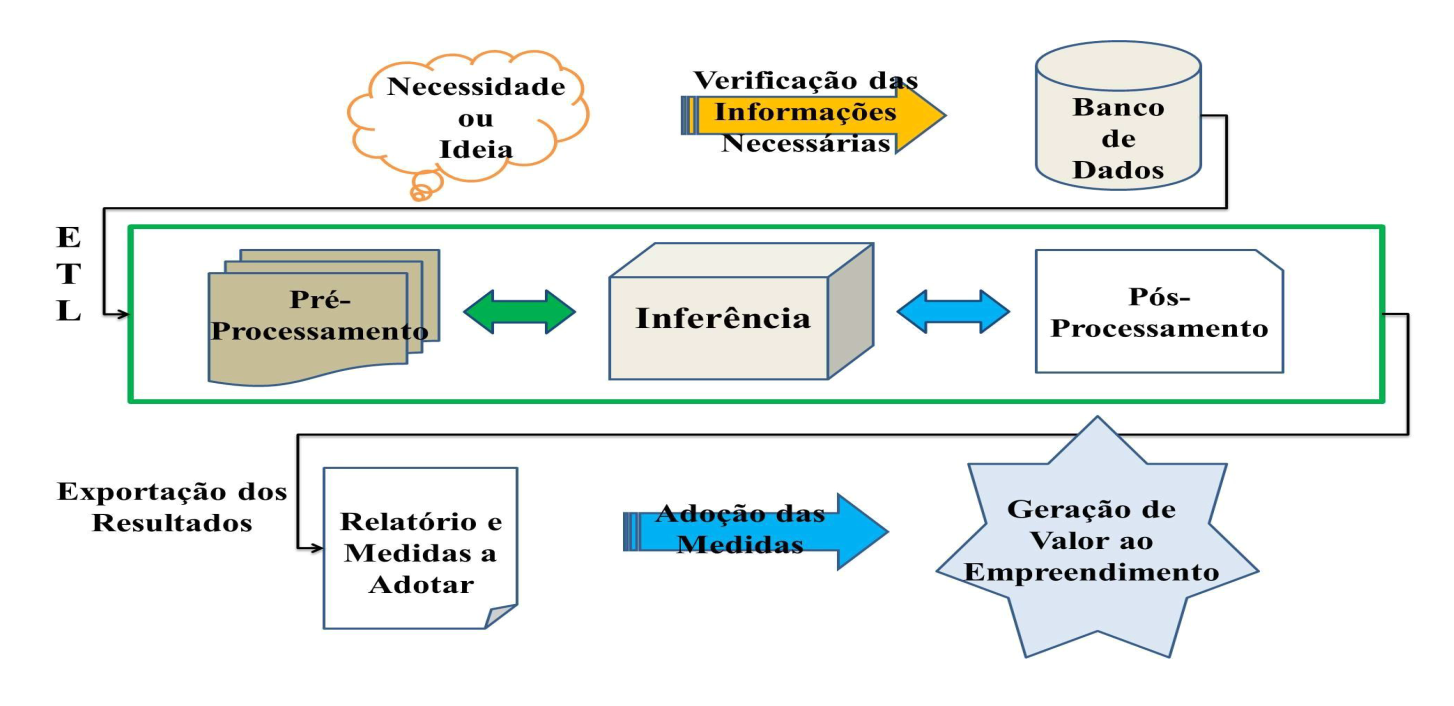

*   Leitura e análise exploratória da base de dados.
*   Tratamento dos dados.
*   Aplicação de modelos de machine learning para previsão de resultados.

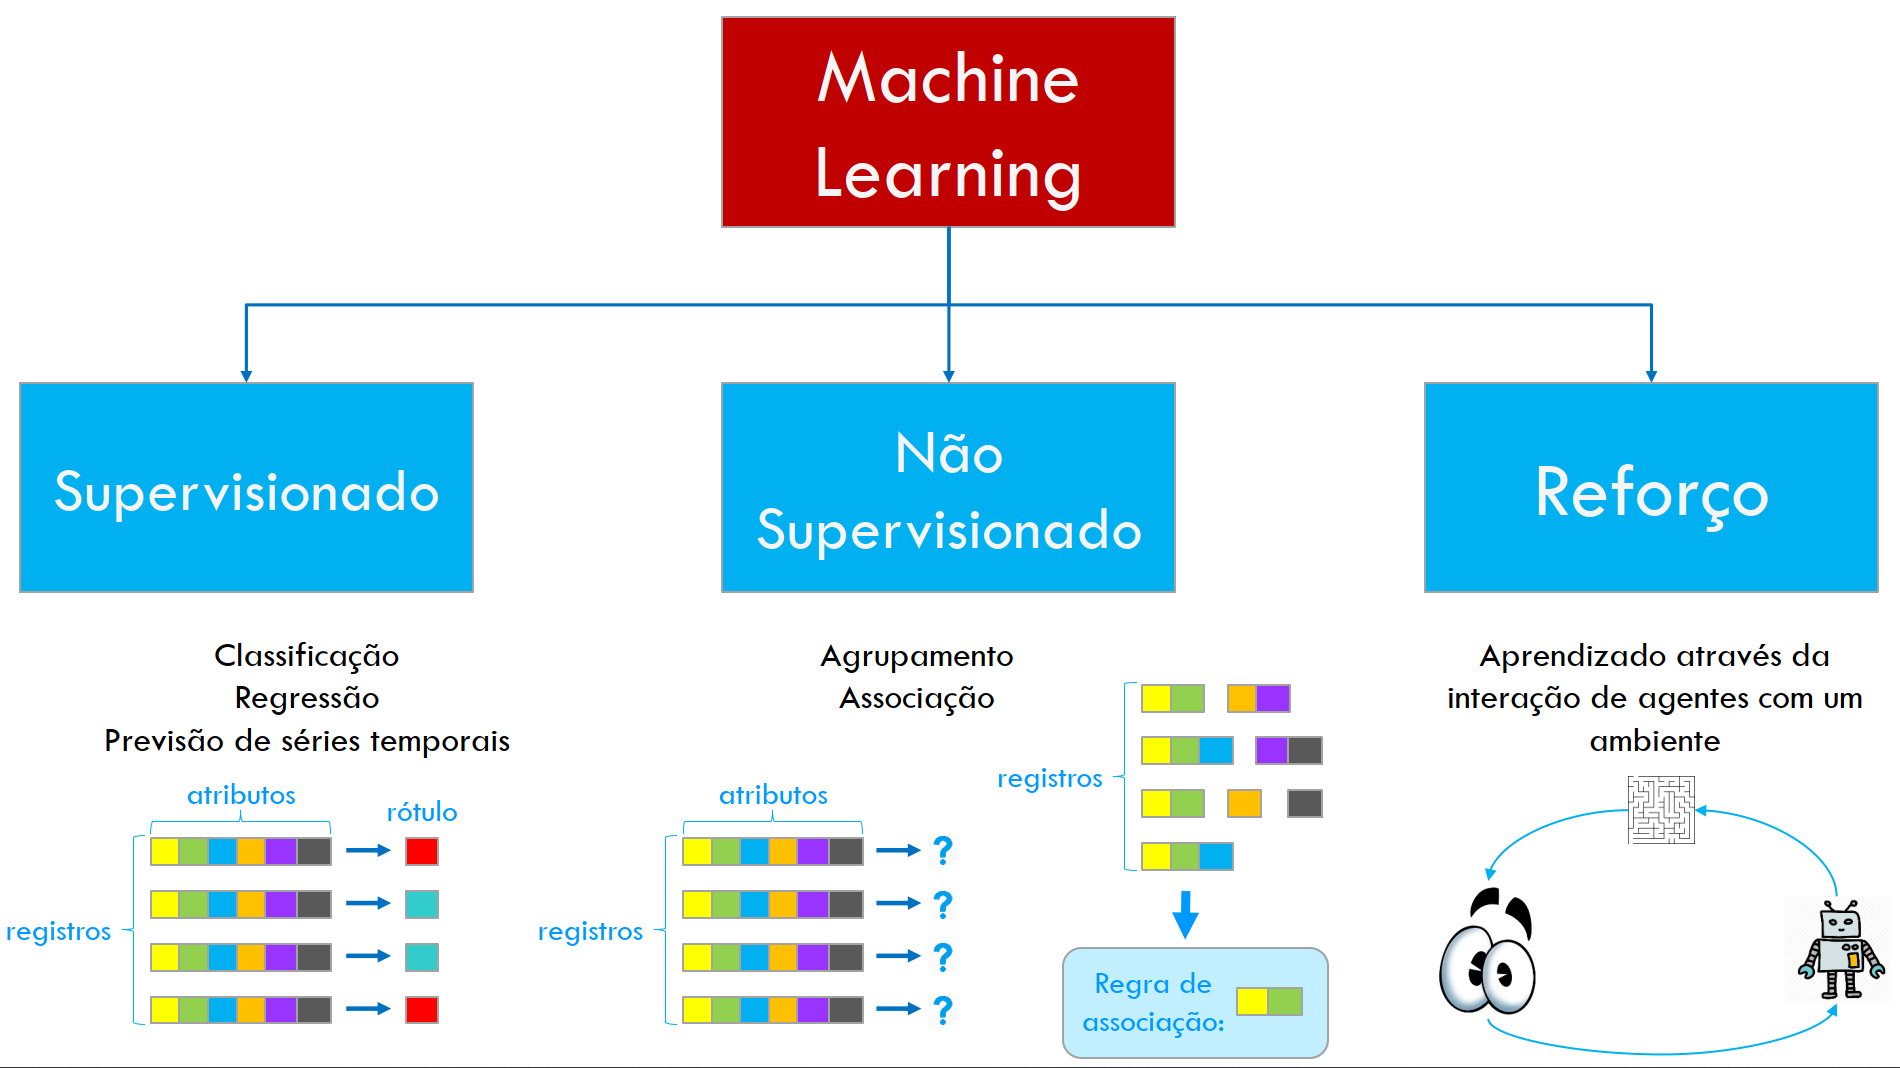







    
      
      


#**2. Descrição do Estudo de Caso**

Neste estudo de caso, discutimos métodos de machine learning aplicados à base de dados “horse.csv” com objetivo de prever se um cavalo pode sobreviver ou não com base em condições médicas anteriores. 
A base de dados dispõe de 300 registros e 27 atributos, cuja descrição é dada a seguir:

### **1. surgery**
1 = Sim, o cavalo fez cirurgia 

2 = O cavalo foi tratado sem cirurgia 

### **2. age**
1= Adulto

2= Jovem (< 6 meses) 

### **3. Hospital Number**

- id numérico
- o número do caso atribuído ao cavalo (pode não ser único se o cavalo for tratado> 1 vez)

### **4. rectal temperature**
- linear
- em graus celsius.
- uma temperatura elevada pode ocorrer devido à infecção
- a temperatura pode ser reduzida quando o animal  está em choque
- a temperatura normal é 37.8
- este parâmetro geralmente muda conforme o problema progride, por exemplo, pode começar normal, depois ficar elevado por causa da lesão, voltando para a faixa normal conforme o cavalo entra em choque

###**5. pulse**
- linear
- a frequência cardíaca em batimentos por minuto
- é um reflexo da condição cardíaca: 30 -40 é normal para adultos
- raro ter uma taxa menor do que o normal, embora cavalos atléticos possam ter uma taxa de 20-25
- animais com lesões dolorosas ou sofrendo de choque circulatório podem ter uma frequência cardíaca elevada


### **6. respiratory rate**
- linear
- a taxa normal é de 8 a 10
- utilidade duvidosa devido às grandes flutuações

### **7. temperature of extremities**
- uma indicação subjetiva de circulação periférica
- valores possíveis:

1 = normal

2 = quente

3 = legal

4 = frio

- extremidades frias  indicam possível choque
- extremidades quentes devem estar correlacionadas a uma temperatura retal elevada.

### **8. peripheral pulse**
- subjetivo
- os valores possíveis são:

1 = normal

2 = aumentado

3 = reduzido

4 = ausente

- p.p. normal ou aumentada são indicativos de circulação adequada, enquanto reduzida ou ausente indica má perfusão

### **9. mucous membranes**
- uma medida subjetiva de cor
- os valores possíveis são:

1 = rosa normal

2 = rosa brilhante

3 = rosa pálido

4 = cianótico pálido

5 = vermelho brilhante / injetado

6 = cianótico escuro

- 1 e 2 provavelmente indicam uma circulação normal ou ligeiramente aumentada

- 3 podem ocorrer no início do choque

- 4 e 6 são indicativos de comprometimento circulatório sério

- 5 é mais indicativo de septicemia

### **10. capillary refill time**

- um julgamento clínico. Quanto mais longo for o refil, pior será a circulação
- valores possíveis

1 = <3 segundos

2 => = 3 segundos

### **11. pain**

- um julgamento subjetivo do nível de dor do cavalo
- valores possíveis:

1 = alerta, sem dor

2 = deprimido

3 = dor leve intermitente

4 = dor intensa intermitente

5 = dor intensa contínua

- NÃO deve ser tratada como uma variável ordenada ou discreta!
- em geral, quanto mais dolorido, maior a probabilidade de exigir cirurgia
-o tratamento anterior da dor pode mascarar o nível de dor até certo ponto

### **12. peristalsis**
- uma indicação da atividade no intestino do cavalo. Conforme o intestino se torna mais distendido ou o cavalo
torna-se mais tóxico, a atividade diminui
- valores possíveis:

1 = hipermotila

2 = normal

3 = hipomotila

4 = ausente  

###**13. abdominal distension**
- Um parâmetro IMPORTANTE.
- valores possíveis

1 = nenhum

2 = leve

3 = moderado

4 = grave

- um animal com distensão abdominal pode sentir dor e apresentar motilidade intestinal reduzida.
- um cavalo com distensão abdominal severa provavelmente precisará de cirurgia apenas para aliviar a pressão

###**14. nasogastric tube**
- refere-se a qualquer gás saindo do tubo
- valores possíveis:

1 = nenhum

2 = leve

3 = significativo

- uma grande cápsula de gás no estômago pode causar desconforto ao cavalo

###**15. nasogastric reflux** 
- valores possíveis

1 = nenhum 

2 => 1 litro

3 = <1 litro

- quanto maior a quantidade de refluxo, maior a probabilidade de haver alguma obstrução séria à passagem de fluido do resto do intestino

###**16. nasogastric reflux PH**
- linear
- a escala é de 0 a 14 com 7 sendo neutro
- os valores normais estão na faixa de 3 a 4

###**17. rectal examination**
- fezes 
- valores possíveis

1 = normal

2 = aumentado

3 = diminuiu

4 = ausente

- a ausência de fezes provavelmente indica uma obstrução

###**18. abdomen** 
- valores possíveis

1 = normal

2 = outro

3 = fezes firmes no intestino grosso

4 = intestino delgado distendido

5 = intestino grosso distendido

- 3 é provavelmente uma obstrução causada por uma impactação mecânica e normalmente é tratada clinicamente

- 4 e 5 indicam uma lesão cirúrgica

###**19. packed cell volume**
- linear
- o número de glóbulos vermelhos por volume no sangue
- a faixa normal é de 30 a 50. O nível sobe conforme a circulação fica comprometida ou conforme o animal
fica desidratado.

###**20. total protein**
- linear
- os valores normais estão na faixa de 6-7,5 (gms / dL)
- quanto maior o valor, maior a desidratação

###**21. abdominocentesis appearance**
- uma agulha é colocada no abdômen do cavalo e o fluido é obtido a partir da cavidade abdominal
- valores possíveis:

1 = claro

2 = nublado

3 = serossanguinolento

- o líquido normal é claro, enquanto turvo ou serossanguinolento indica um intestino comprometido

###**22. abdomcentesis total protein** 
- linear
- quanto mais alto o nível de proteína, maior é a probabilidade de haver um intestino comprometido. Os valores estão em
gms / dL

###**23. outcome**
- o que acabou acontecendo com o cavalo?
- valores possíveis:

1 = viveu

2 = morreu

3 = foi sacrificado

###**24. surgical lesion**
- retrospectivamente, o problema (lesão) foi cirúrgico?
- todos os casos são operados ou autopsiados para que este valor e o tipo de lesão sejam sempre conhecidos
- valores possíveis:

1 = Sim

2 = Não

###**25, 26, 27: type of lesion** 
- o primeiro número é o local da lesão

1 = gástrico

2 = sm intestino

3 = lg dois pontos

4 = lg cólon e ceco

5 = ceco

6 = cólon transverso

7 = retorno / cólon descendente

8 = útero

9 = bexiga

11 = todos os locais intestinais

00 = nenhum

- o segundo número é o tipo

1 = simples

2 = estrangulamento

3 = inflamação

4 = outro

- o terceiro número é um subtipo

1 = mecânico

2 = paralítico

0 = n / a

- o quarto número é um código específico

1 = obturação

2 = intrínseco

3 = extrínseco

4 = adinâmico

5 = volvo / torção

6 = intussupção

7 = tromboembólica

8 = hérnia

9 = lipoma / encarceramento esênico

10 = deslocamento

0 = n / a

##**28: cp_data**

- existem dados patológicos para este caso?

1 = Sim

2 = Não
- esta variável não é significativa, uma vez que os dados da patologia não são incluídos ou coletados para esses casos




#**3. Proposta de Desenvolvimento**

Nesta seção, apresentamos uma síntese do processo proposto para o desenvolvimento desse estudo de caso, que se divide basicamente nas seguintes etapas:

1ª)  Análise Exploratória: nesta etapa, buscamos checar a existência de dados faltantes, o balanceamento da base e a existência de outliers e de colunas não relevantes para o estudo de caso. Também plotamos diversos gráficos na busca por relações entre as variáveis.

2ª) ETL: nesta fase, sugerimos diferentes estratégias para o tratamento e limpeza da base de dados. 

3ª) Machine Learning: nesta etapa, aplicamos diversos modelos de classificação para previsão de resultados.




# **4. Código**

A seguir, apresentamos o código desenvolvido no  Google Colaboratory, juntamente com a justificativa de cada etapa.

## 4.1. Leitura das bases de treino e teste

### Importação dos pacotes necessários para viabilidade da Análise Exploratória e criação do Modelo

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Seed para reprodução de resultados
seed = 10
random.seed(seed)
np.random.seed(seed)

### Leitura da base de dados de treino (horse.csv)

In [ ]:
data_treino = pd.read_csv('horse.csv')
data_treino.tail(10)

surgery    age  hospital_number  ...  lesion_2  lesion_3  cp_data
289      no  adult           535054  ...         0         0       no
290     yes  adult           528890  ...         0         0       no
291     yes  adult           530034  ...         0         0       no
292     yes  adult           534004  ...         0         0       no
293      no  adult           533902  ...         0         0       no
294     yes  adult           533886  ...         0         0       no
295      no  adult           527702  ...         0         0      yes
296     yes  adult           529386  ...         0         0       no
297     yes  adult           530612  ...         0         0      yes
298     yes  adult           534618  ...         0         0       no

[10 rows x 28 columns]

### Leitura da base de dados de teste (horseTest.csv)

In [ ]:
# Leitura da base de teste
data_teste = pd.read_csv('horseTest.csv')
data_teste.head(10)

surgery    age  hospital_number  ...  lesion_2  lesion_3  cp_data
0      no  adult                1  ...         0         0       no
1      no  adult                2  ...         0         0       no
2     yes  adult                3  ...         0         0       no
3      no  young                4  ...         0         0      yes
4     yes  adult                5  ...         0         0      yes
5     yes  adult                6  ...         0         0       no
6     yes  young                7  ...         0         0       no
7     yes  adult                8  ...         0         0      yes
8     yes  adult                9  ...         0         0       no
9      no  adult               10  ...         0         0       no

[10 rows x 28 columns]

##  4.2. Análise Exploratória

### Dimensão da base de dados de treino

In [ ]:
data_treino.shape

(299, 28)

Para treinamento utilzaremos a base de treino contendo 299 linhas e 28 atributos iniciais

### Dimensão da base de dados de teste

In [ ]:
data_teste.shape

(89, 28)

Para treinamento utilzaremos a base de teste para inferência, contendo 89 linhas e 28 atributos iniciais

### Verificando o tipo de cada atributo da base treino

In [ ]:
data_treino.dtypes

surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
outcome                   object
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object

### Verificação de Missing Values


In [ ]:
data_treino.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

Foi identificada a existência de diversos atributos com quantidade significativa de dados faltantes na base de treino.

### Analisando estatísticas da base de treino

In [ ]:
data_treino.describe()

hospital_number  rectal_temp  ...     lesion_2     lesion_3
count     2.990000e+02   239.000000  ...   299.000000   299.000000
mean      1.087733e+06    38.168619  ...    90.528428     7.387960
std       1.532032e+06     0.733744  ...   650.637139   127.749768
min       5.184760e+05    35.400000  ...     0.000000     0.000000
25%       5.289040e+05    37.800000  ...     0.000000     0.000000
50%       5.303010e+05    38.200000  ...     0.000000     0.000000
75%       5.347360e+05    38.500000  ...     0.000000     0.000000
max       5.305629e+06    40.800000  ...  7111.000000  2209.000000

[8 rows x 11 columns]

### Checagem do balanceamento das classes

In [ ]:
data_treino.outcome.value_counts()

lived         178
died           77
euthanized     44
Name: outcome, dtype: int64

 Indentificado que a base encontra-se desbalanceada.

### Identificação de atributos irrelevantes para a criação do Modelo

In [ ]:
data_treino.hospital_number.value_counts().max()

2

Intuitivamente, espera-se que o atributo hospital_number não seja determinante para os fins desse estudo de caso. Para comprovar este fato, vamos primeiramente averiguar qual o número máximo de registros para cada elemento único desta coluna.

In [ ]:
data_treino = data_treino.loc[:,data_treino.columns != 'hospital_number']

Como há no maximo dois registros em cada hospital, este atributo será excluído da base de dados de treino

Excluindo atributos com mais de 40% dos  dados faltantes:

In [ ]:
for col in data_treino.columns:
  if data_treino[col].isnull().sum() > 0.4*(data_treino.shape[0]):
    data_treino = data_treino.drop([col], axis =1)
    print(col)
  else:
    continue

nasogastric_reflux_ph
abdomo_appearance
abdomo_protein


### Verificação de registros duplicados

In [ ]:
#Verificando se há dados duplicados
data_treino[data_treino.duplicated(keep='first')].shape

(1, 24)

Não existem registros duplicados

### Checagem final da base de dados de treino

In [ ]:
data_treino.head()

surgery    age  rectal_temp  pulse  ...  lesion_1 lesion_2 lesion_3 cp_data
0      no  adult         38.5   66.0  ...     11300        0        0      no
1     yes  adult         39.2   88.0  ...      2208        0        0      no
2      no  adult         38.3   40.0  ...         0        0        0     yes
3     yes  young         39.1  164.0  ...      2208        0        0     yes
4      no  adult         37.3  104.0  ...      4300        0        0      no

[5 rows x 24 columns]

In [ ]:
data_treino.shape

(299, 24)

Dos 28 atributos iniciais 4 foram retirados por terem dados que poderiam comprometer a qualidade do modelo.

## 4.3. Gráficos de auxílio para Análise Exploratória

### Visualização de missings values pós dropping de atributos não relevantes

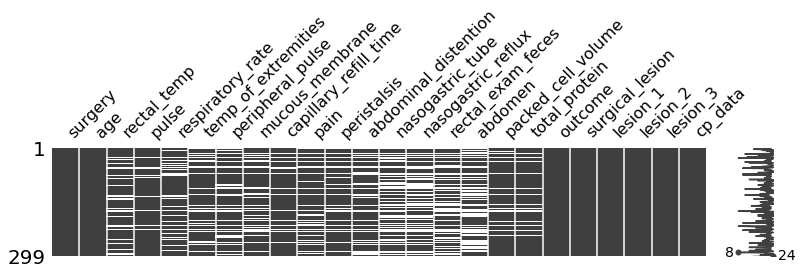

In [ ]:
import missingno as msno
msno.matrix(data_treino, figsize=(13,2));

### Boxplot
Verificação de outliers. Foram excluídos os atributos "lesion_1", "lesion_2" e "lesion_3" dessa análise pela diferença de escala. Serão representados na sequência.

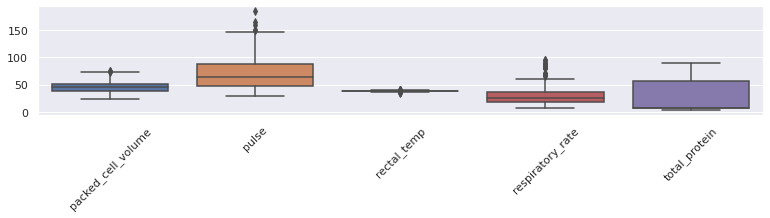

In [ ]:
df1 = data_treino[data_treino.columns.difference(["lesion_1", "lesion_2", "lesion_3"])]
sns.set(rc={'figure.figsize':(13,2)})
ax = sns.boxplot(data=df1)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45) 
plt.show()

Verificando se há outliers nas colunas "lesion_1", "lesion_2", "lesion_3"

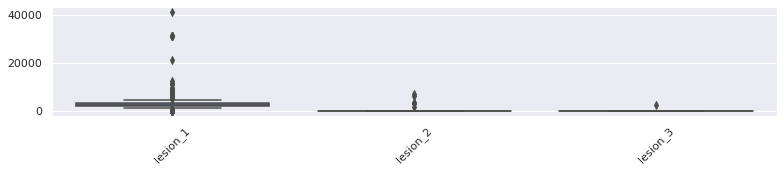

In [ ]:
df2 = data_treino[['lesion_1', 'lesion_2', 'lesion_3']]
sns.set(rc={'figure.figsize':(13,2)})
ax = sns.boxplot(data=df2)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45) 
plt.show()

Após análise do gráfico, foram identificadas lesões pouco relevantes para o Modelo. Isto se comprova pelo estudo abaixo para os atributos "lesion_2" e "lesion_3"

Contagem da quantidade de registros contendo cada um dos valores distintos da coluna "lesion_3":

In [ ]:
data_treino['lesion_3'].value_counts()

0       298
2209      1
Name: lesion_3, dtype: int64

Contagem da quantidade de registros contendo cada um dos valores distintos da coluna "lesion_2":

In [ ]:
data_treino['lesion_2'].value_counts()

0       292
3111      3
6112      1
7111      1
1400      1
3112      1
Name: lesion_2, dtype: int64

Como resultante desta análise, foram excluídos os atributos "lesion_2" e "lesion_3" da base de treino

In [ ]:
data_treino = data_treino.drop(['lesion_2', 'lesion_3'], axis=1)

In [ ]:
data_treino.shape

(299, 22)

Neste momento da análise dos 28 atribtuos iniciais continuamos com 22 atributos mais relevantes para criação do Modelo

### Checagem da correlação entre as variáveis numéricas

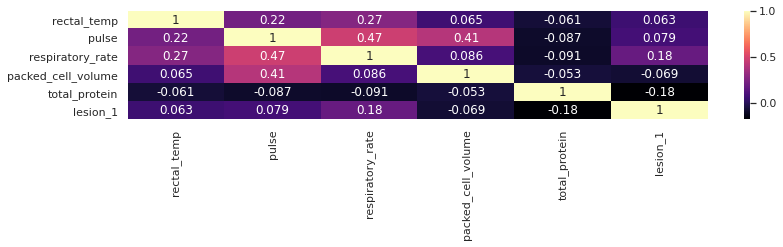

In [ ]:
plt.figure(figsize=(13, 2))
sns.heatmap(data_treino.corr(), cmap = 'magma', annot= True)
plt.show()

Conclusão: não há correlação expressiva entre nenhum par de variáveis numéricas

### Análise da existência de uma medida relevante de associação entre cada um dos atributos.

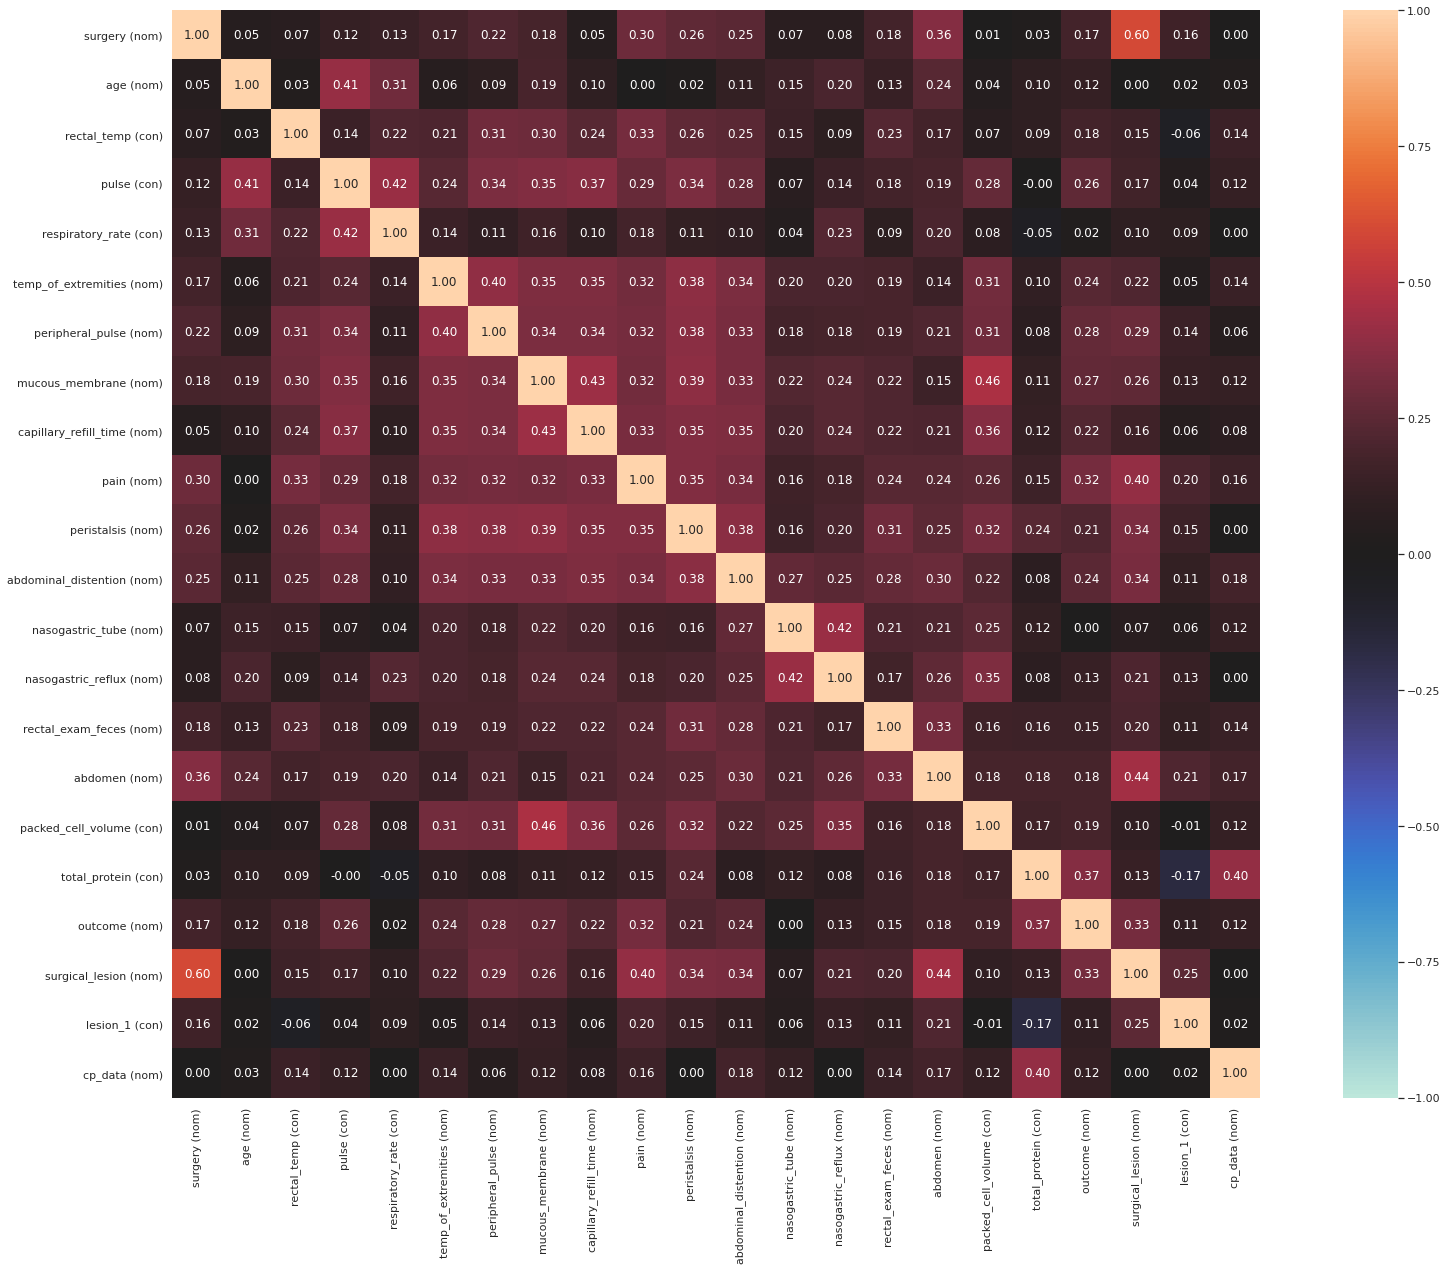

In [ ]:
!pip install dython -q
from dython import nominal
nominal.associations(data_treino,figsize=(30,20),mark_columns=True);

Conclusão: A correlação entre a maioria dos atributos é insignificante. Uma relação mais expressiva occore entre as variáveis "surgery" e "surgical_lesion"

## 4.4. Pré processamento

### Separando as colunas em categóricas e  numéricas

In [ ]:
categorical_columns = [col for col in data_treino.columns if data_treino[col].dtypes == 'object']
numerical_columns = [col for col in data_treino.columns if data_treino[col].dtypes != 'object']

### Visualização dos atributos categóricos

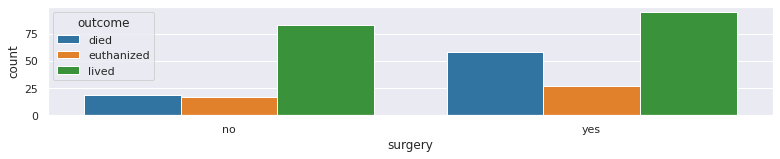

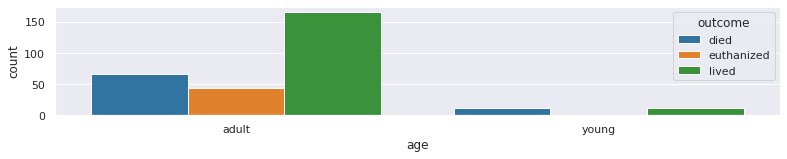

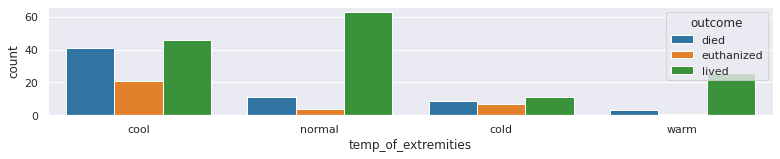

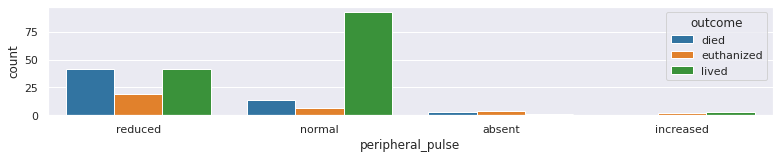

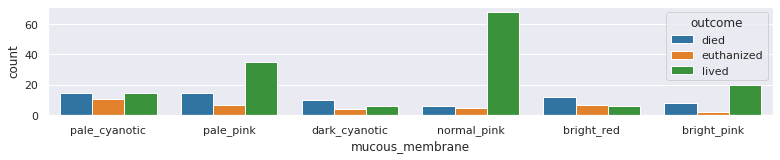

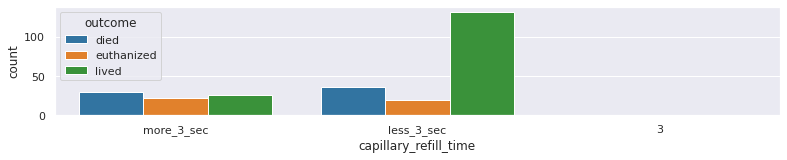

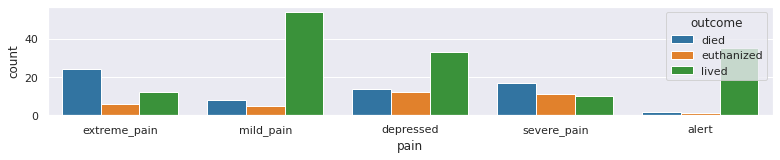

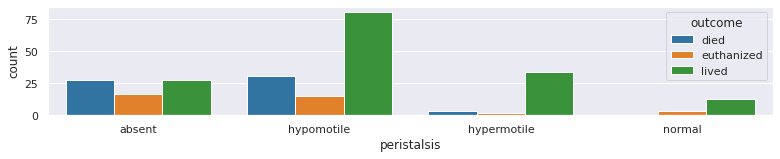

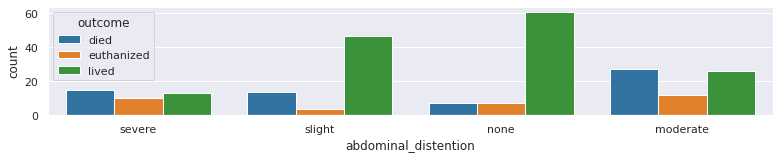

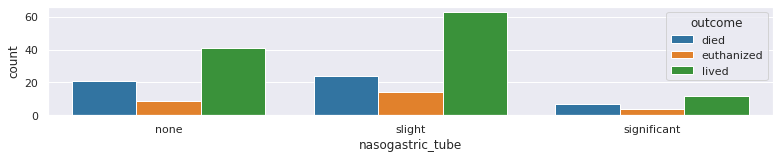

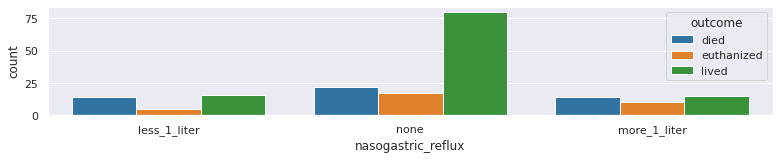

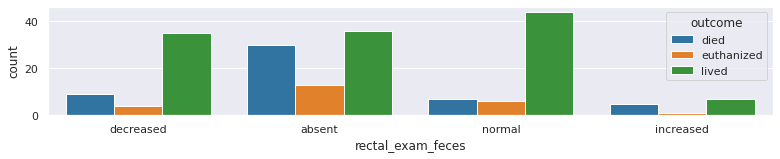

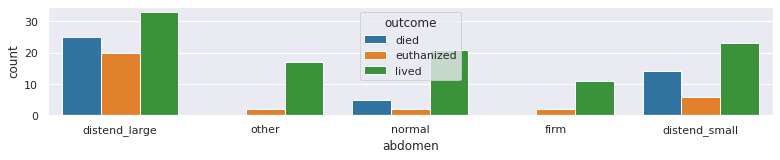

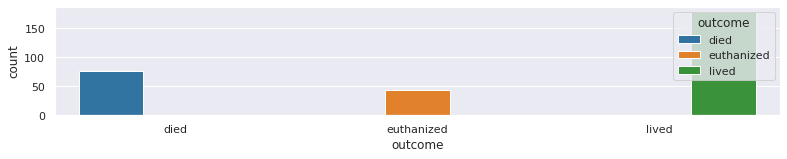

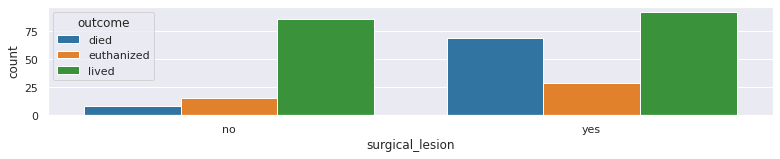

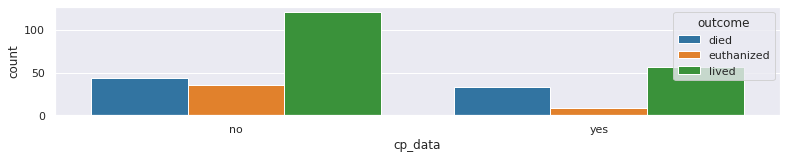

In [ ]:
for col in categorical_columns:
  plt.figure(figsize=(13,2))
  sns.countplot(data=data_treino, x= col, hue='outcome', palette="tab10");

### Visualização da combinação de atributos dois a dois (categóricos x numéricos)

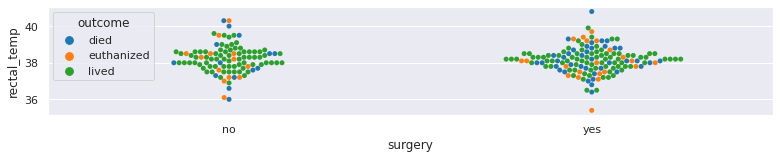

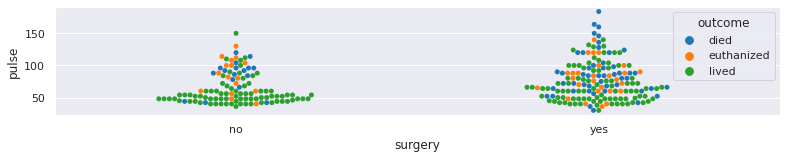

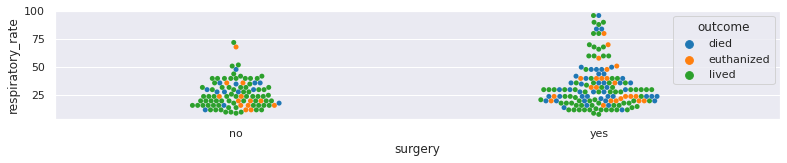

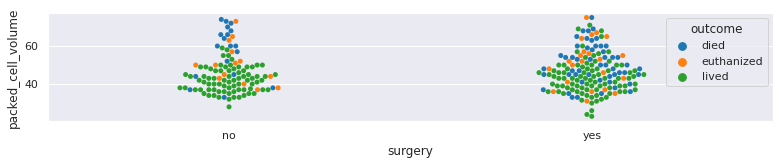

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


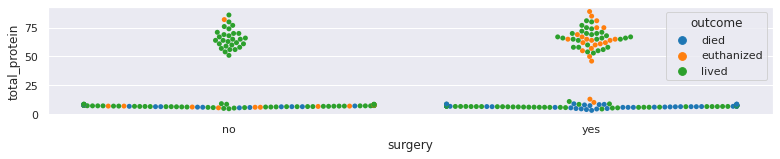

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 36.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


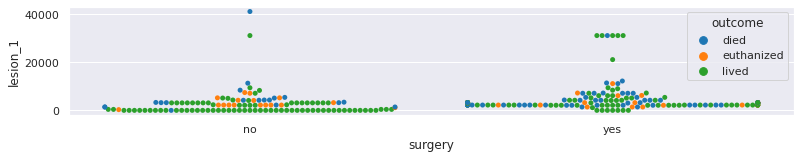

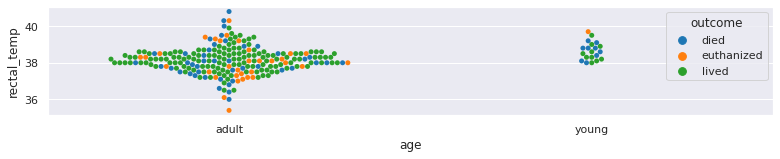

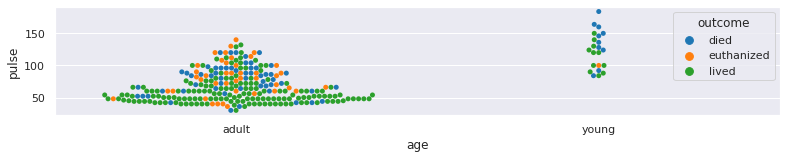

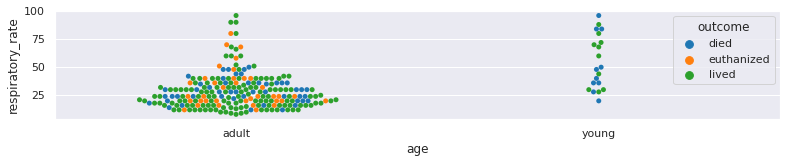

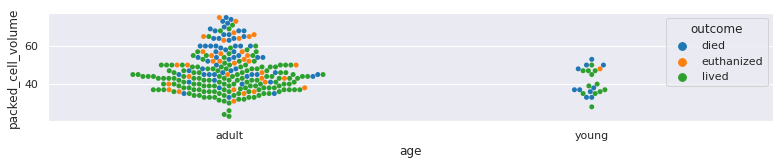

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 38.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


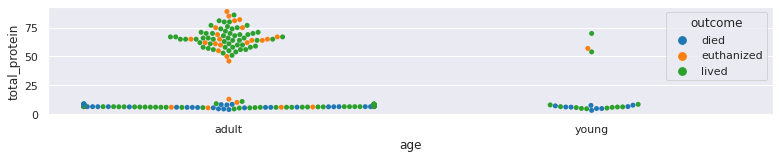

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


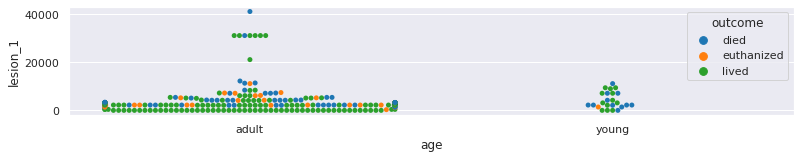

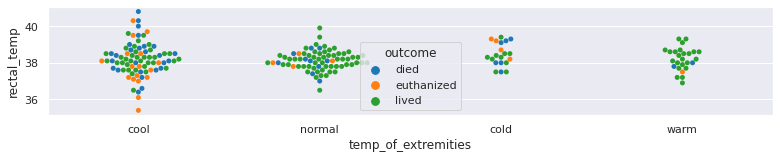

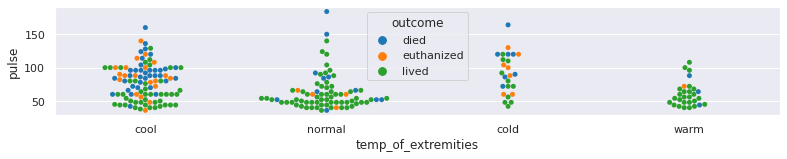

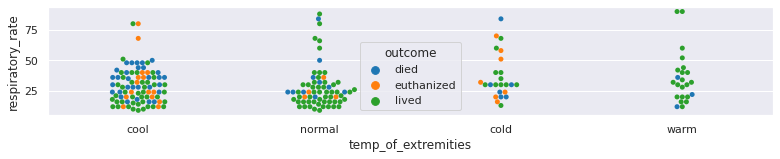

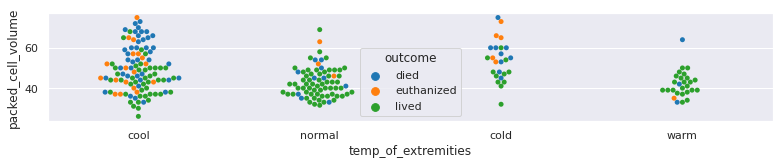

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 34.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


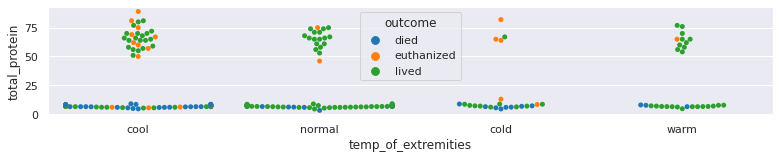

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


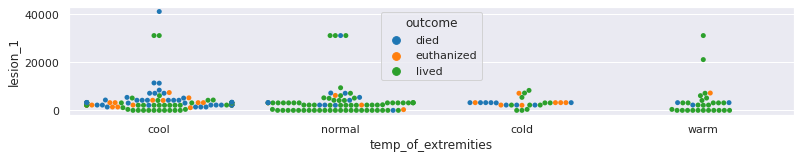

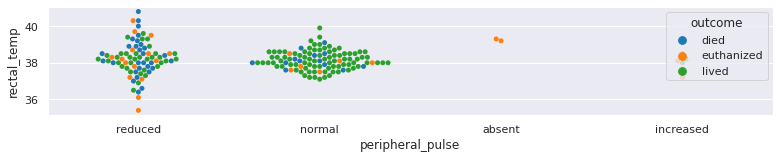

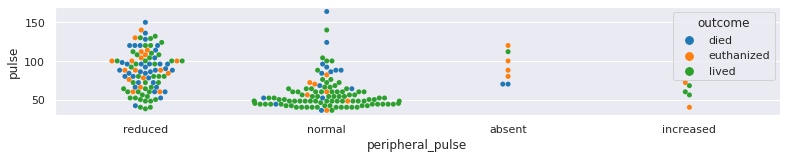

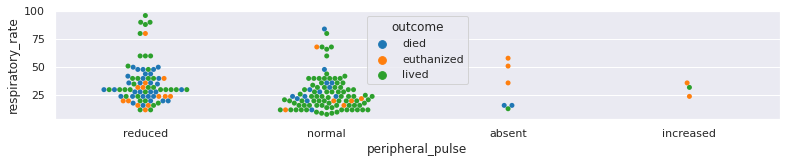

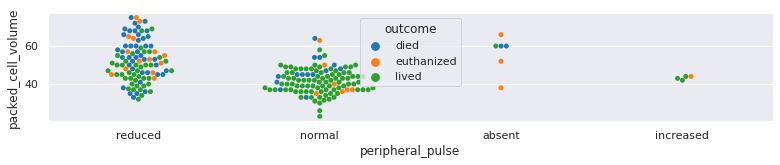

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 35.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 43.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


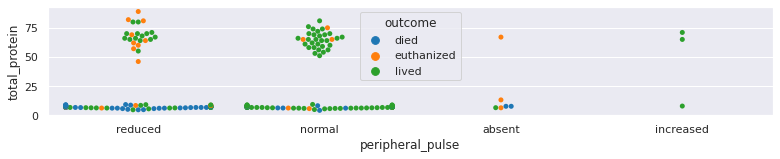

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 35.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


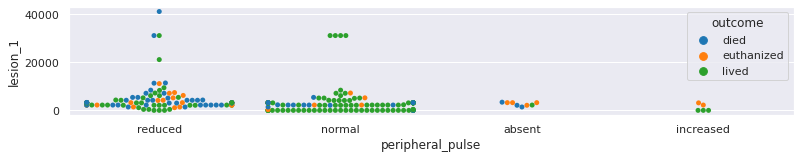

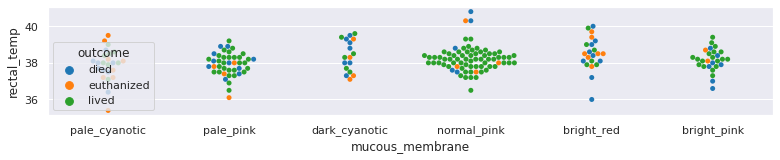

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


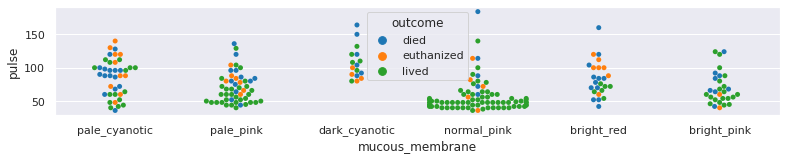

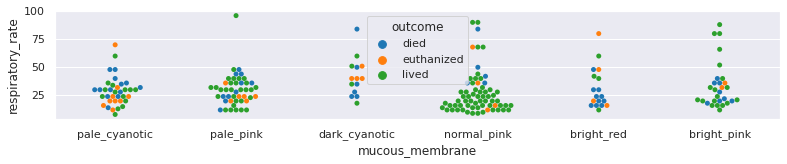

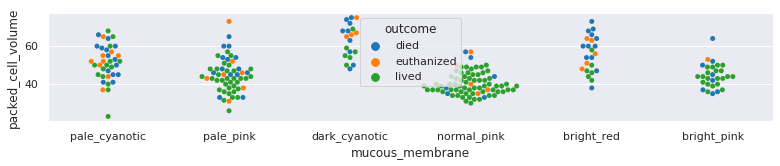

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 36.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 39.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


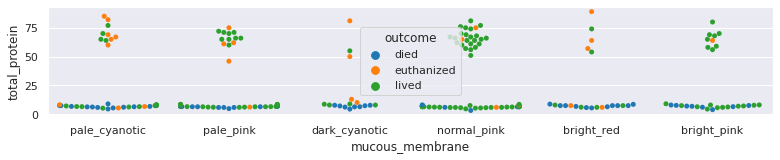

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 27.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


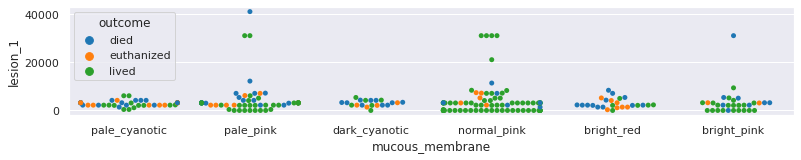

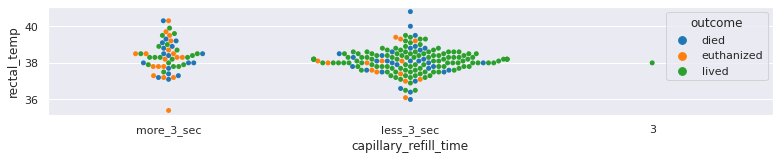

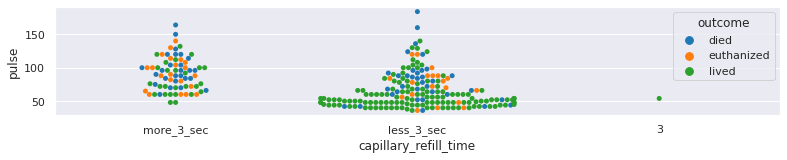

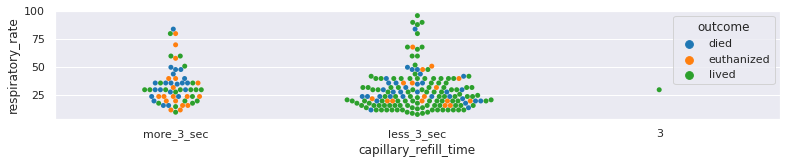

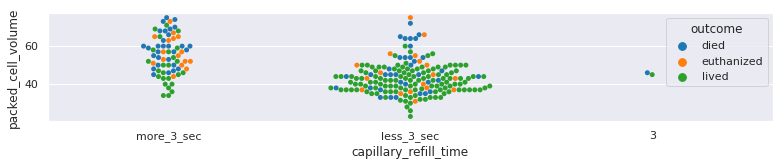

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


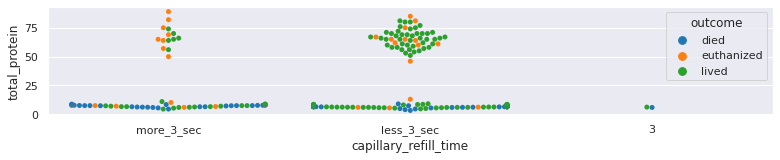

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


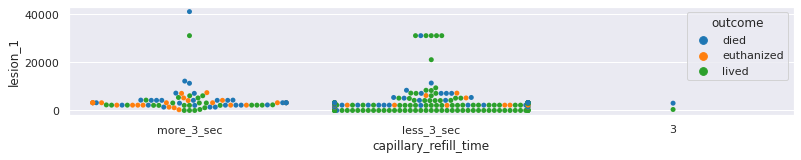

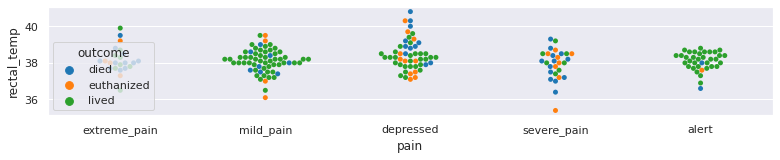

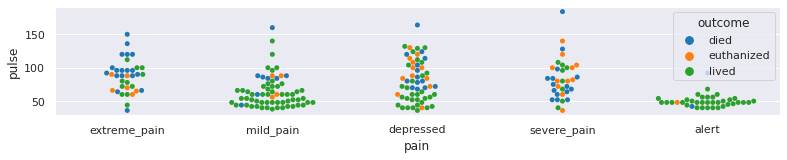

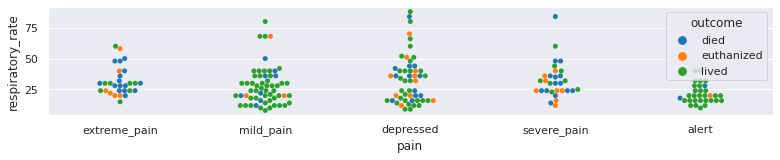

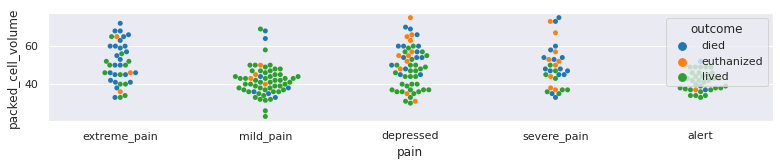

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 35.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


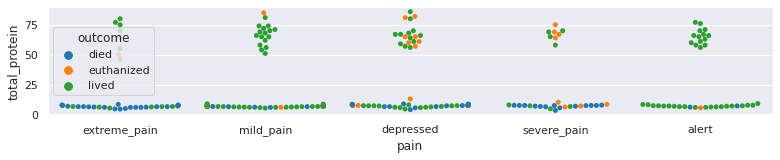

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 26.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


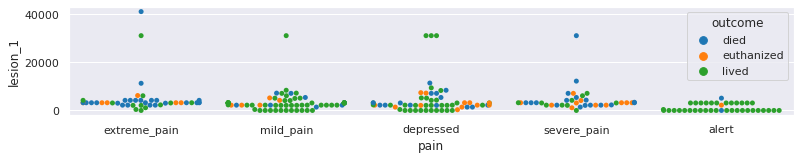

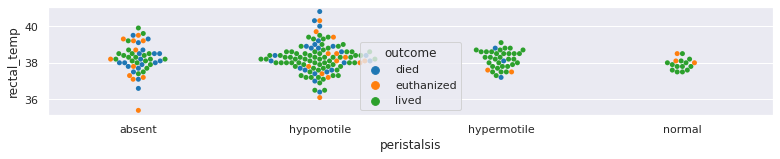

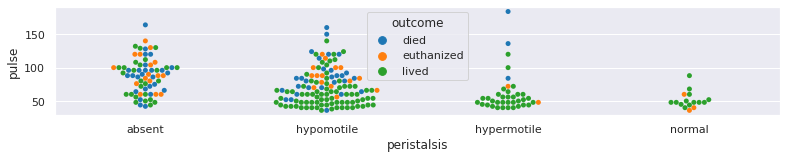

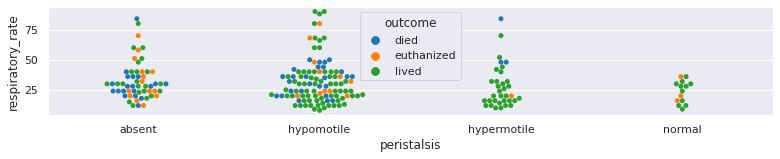

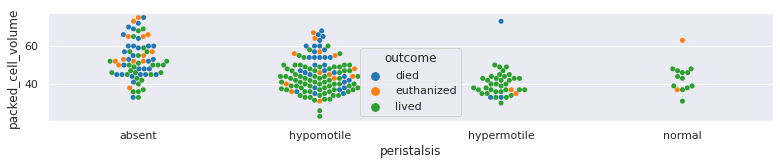

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 43.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


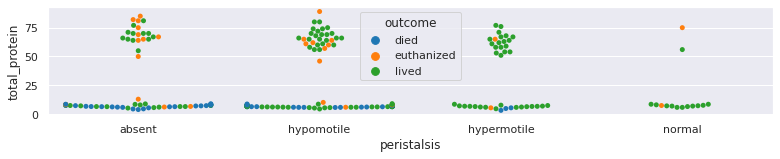

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 28.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 31.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


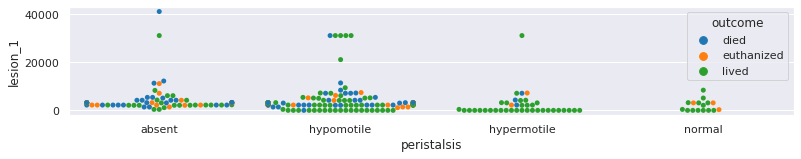

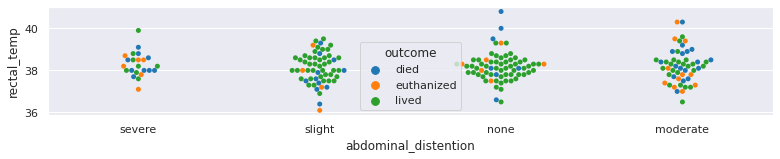

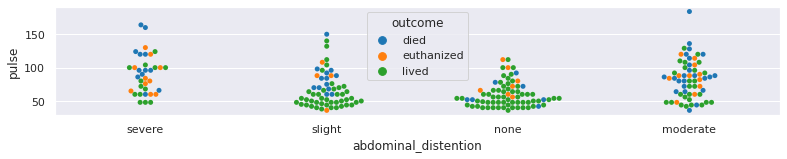

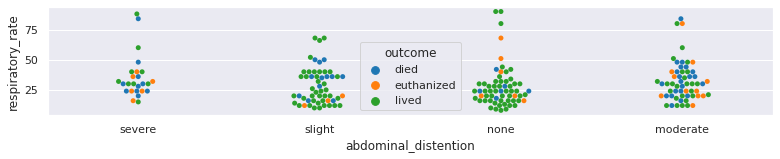

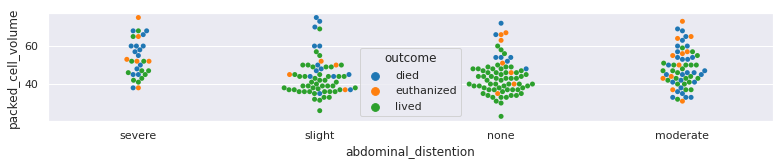

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 29.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 27.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


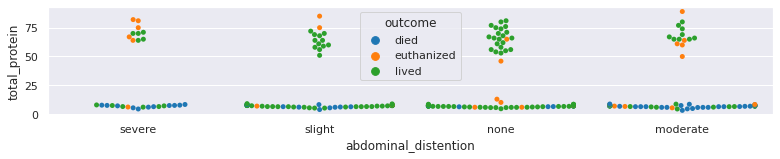

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 24.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


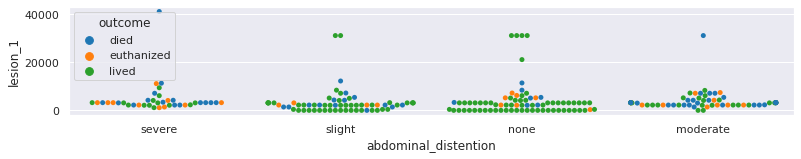

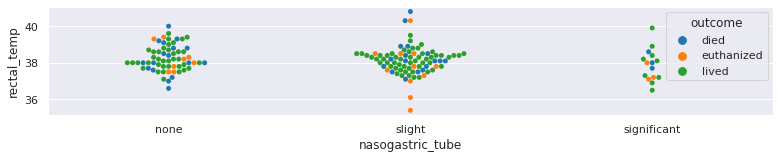

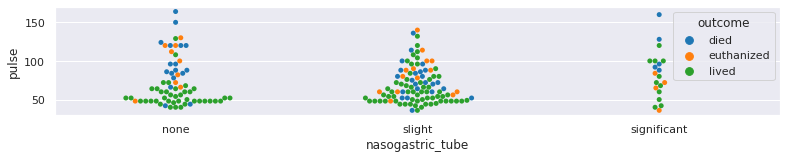

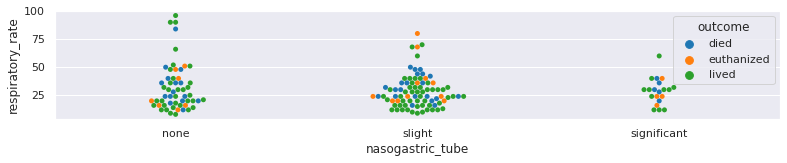

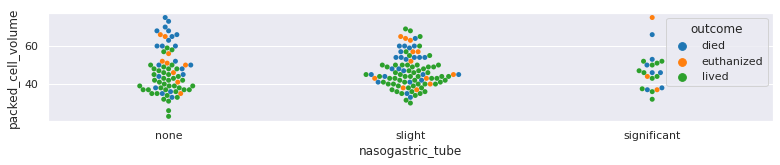

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


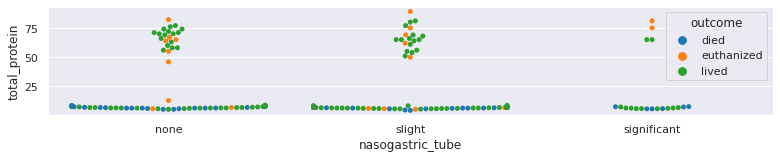

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 24.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


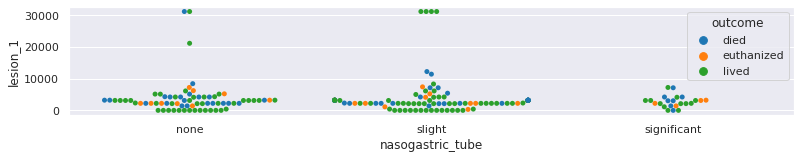

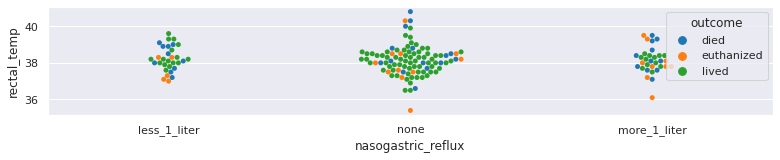

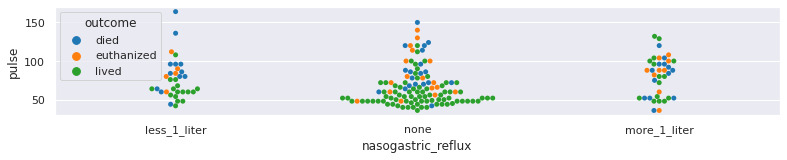

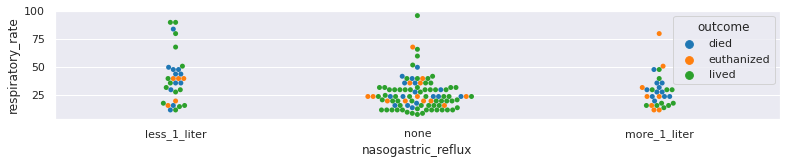

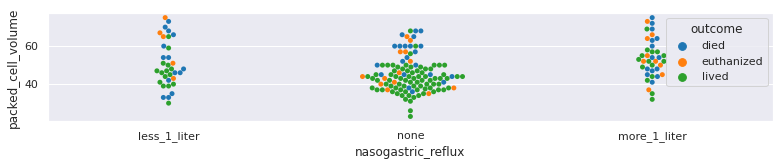

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 32.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


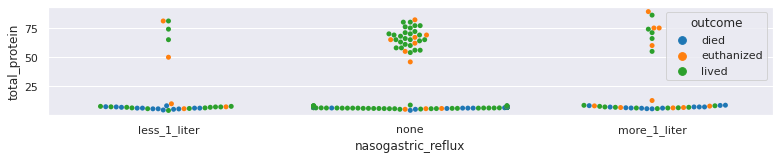

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


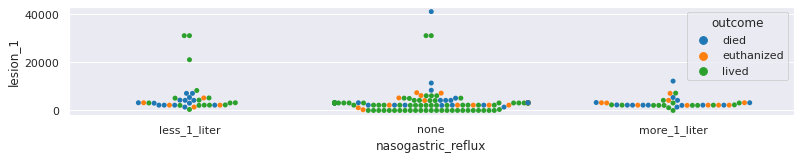

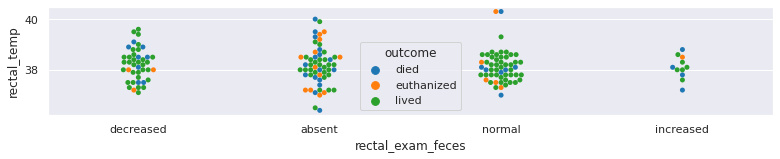

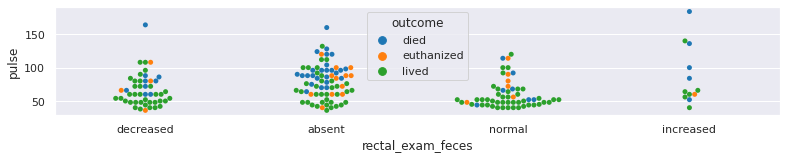

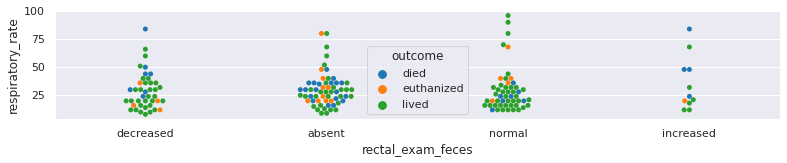

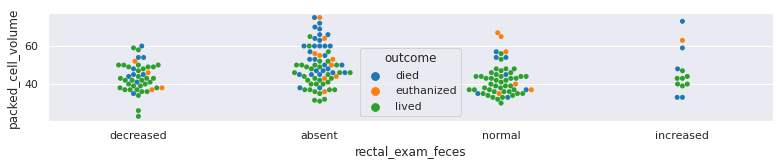

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 21.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


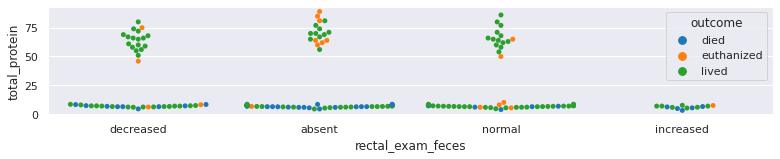

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


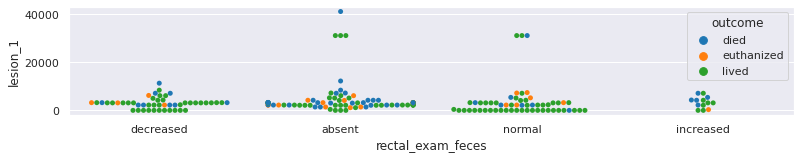

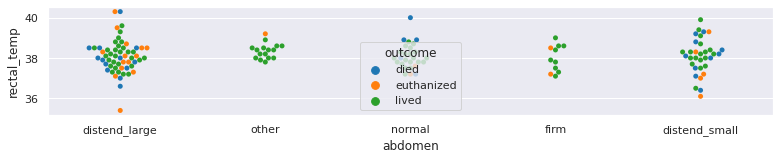

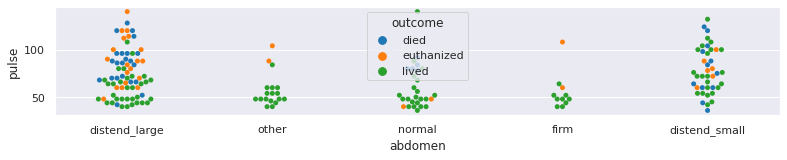

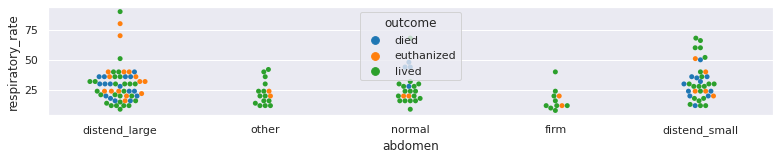

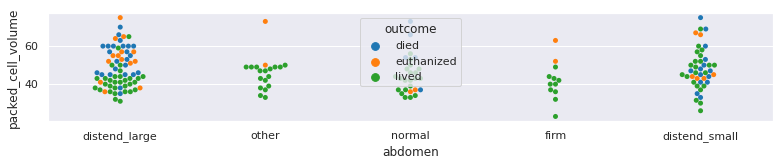

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 26.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


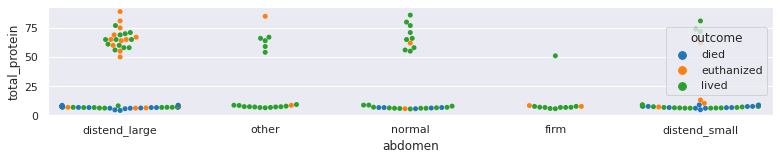

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 39.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


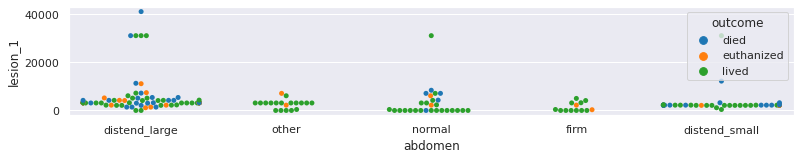

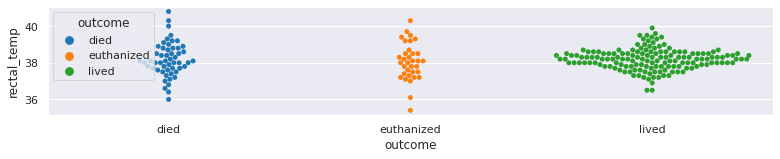

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


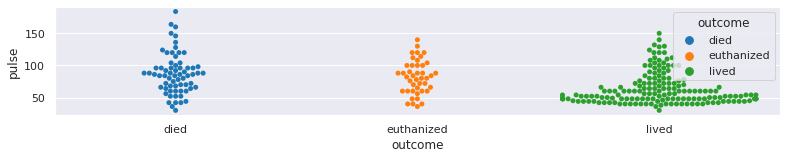

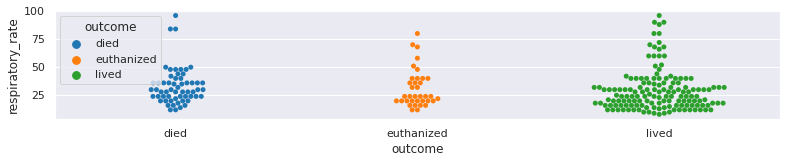

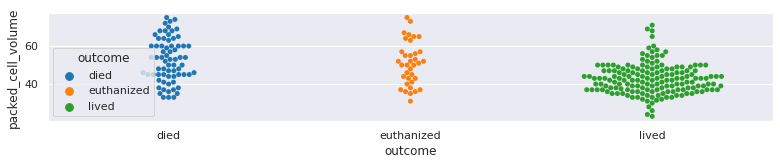

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 29.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


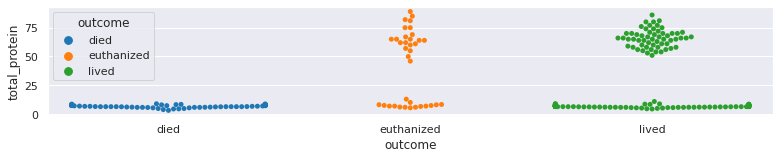

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 39.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


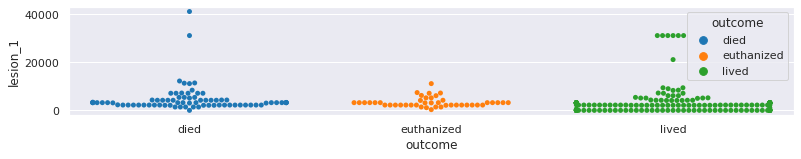

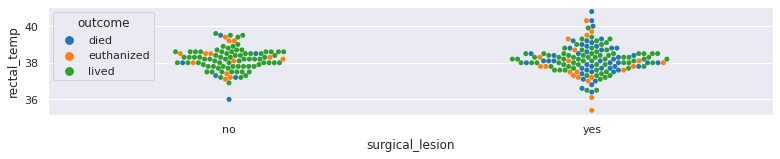

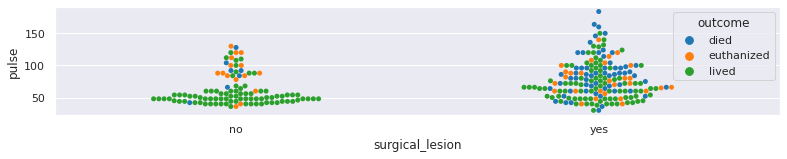

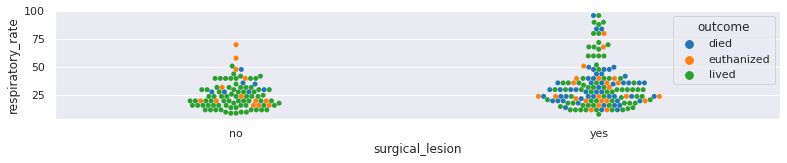

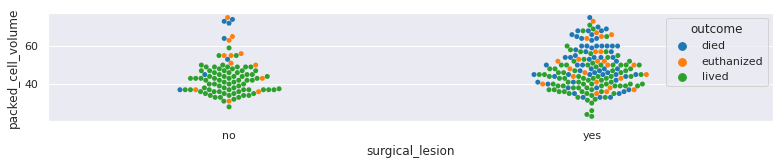

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 31.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


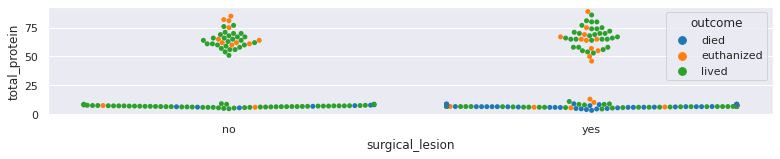

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 39.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


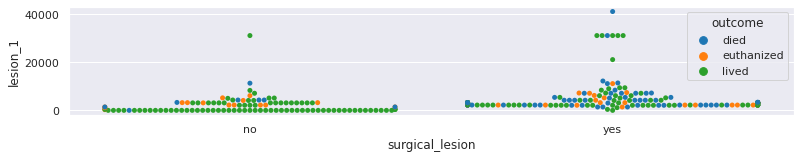

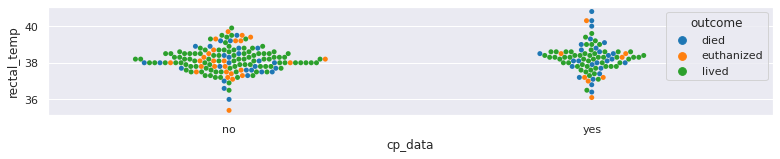

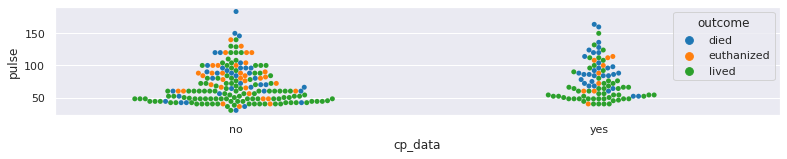

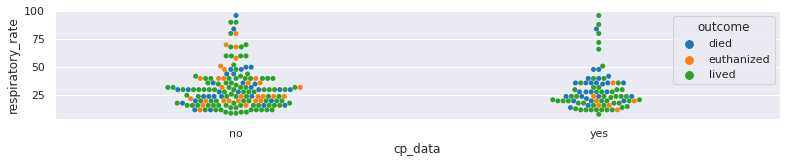

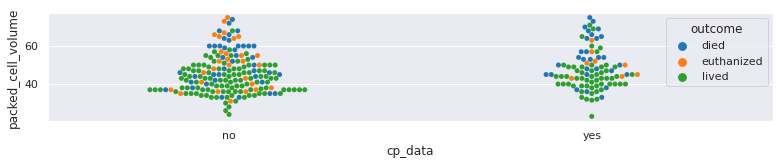

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 19.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


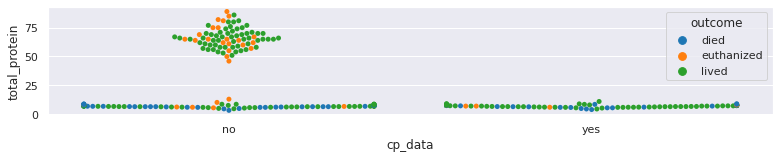

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


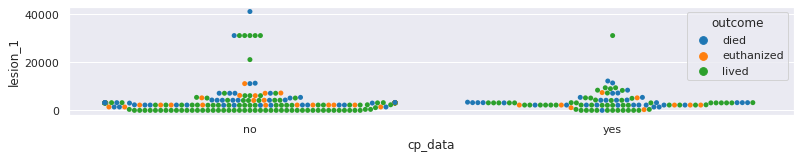

In [ ]:
for col1 in categorical_columns:
  for col2 in numerical_columns:
    plt.figure(figsize=(13,2))
    ax = sns.swarmplot(data=data_treino, x=col1, y=col2, hue="outcome", palette= "tab10")
    ax.set(ylabel=col2)
    plt.show()

### Visualização focada no atributo "outcome"

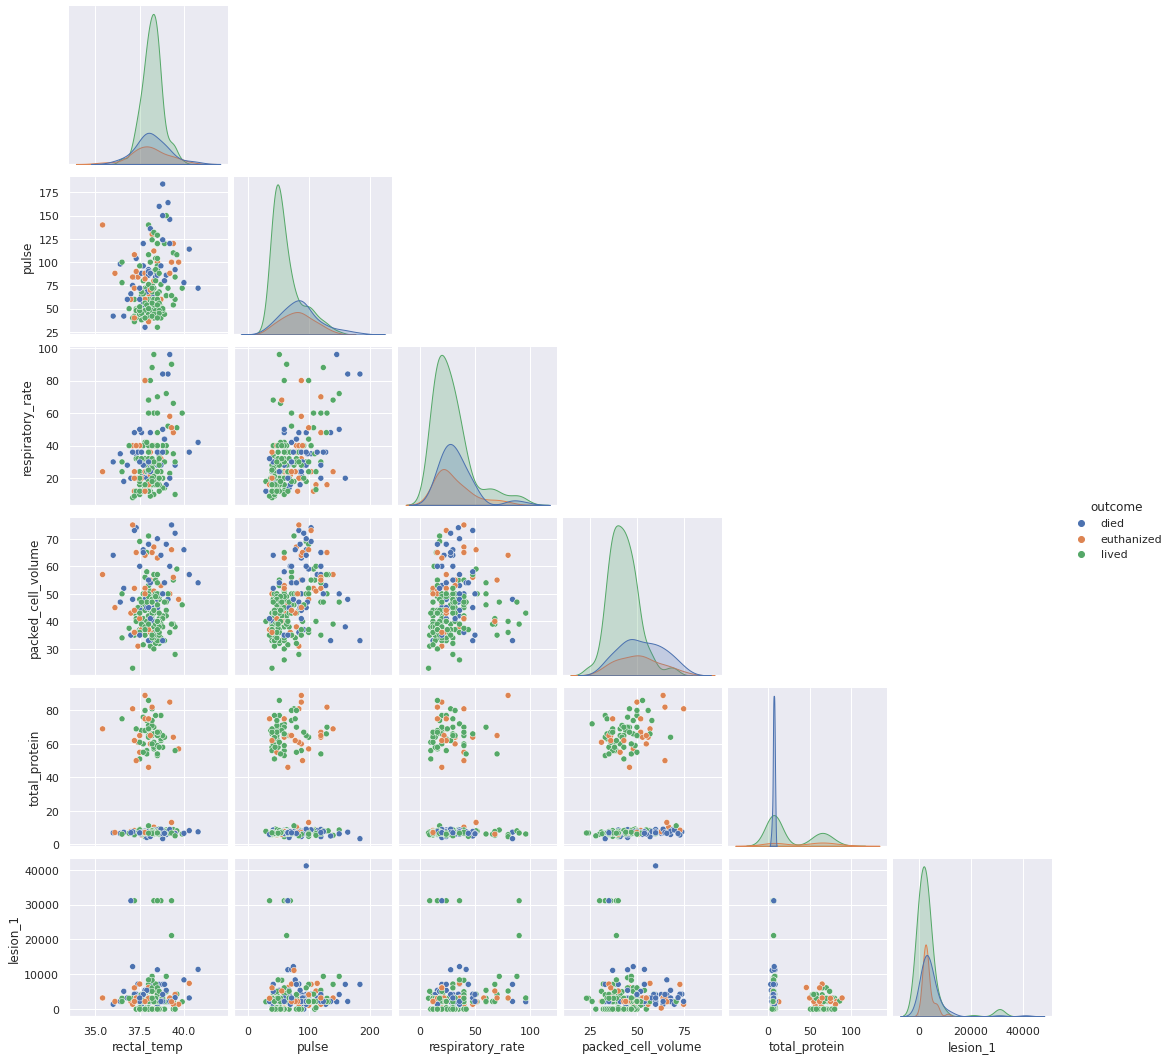

In [ ]:
sns.pairplot(data_treino, hue="outcome", corner=True);

### Separando dados categoricos (sem o output) e numéricos 

In [ ]:
categoricas = [col for col in data_treino.columns if data_treino[col].dtypes == 'object' and col != 'outcome']
numericas = [col for col in data_treino.columns if data_treino[col].dtypes != 'object']

In [ ]:
categoricas

['surgery',
 'age',
 'temp_of_extremities',
 'peripheral_pulse',
 'mucous_membrane',
 'capillary_refill_time',
 'pain',
 'peristalsis',
 'abdominal_distention',
 'nasogastric_tube',
 'nasogastric_reflux',
 'rectal_exam_feces',
 'abdomen',
 'surgical_lesion',
 'cp_data']

### Substituição de missing values nas colunas numéricas

In [ ]:
X_train_numerica= data_treino[numericas]
X_train_categorica = data_treino[categoricas]
X_teste_numerica = data_teste[numericas]
X_teste_categorica = data_teste[categoricas]

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(X_train_numerica)
X_train_numerica = imputer.transform(X_train_numerica)
X_teste_numerica = imputer.transform(X_teste_numerica)

In [ ]:
X_train_numerica = pd.DataFrame(X_train_numerica, columns= numericas)
X_teste_numerica = pd.DataFrame(X_teste_numerica, columns= numericas)

In [ ]:
X_train_numerica.head()

rectal_temp  pulse  ...  total_protein  lesion_1
0         38.5   66.0  ...            8.4   11300.0
1         39.2   88.0  ...           85.0    2208.0
2         38.3   40.0  ...            6.7       0.0
3         39.1  164.0  ...            7.2    2208.0
4         37.3  104.0  ...            7.4    4300.0

[5 rows x 6 columns]

Confirmaçao que não existe mais nulos nos atributos numéricos:

In [ ]:
X_train_numerica.isnull().sum()

rectal_temp           0
pulse                 0
respiratory_rate      0
packed_cell_volume    0
total_protein         0
lesion_1              0
dtype: int64

In [ ]:
X_teste_numerica.isnull().sum()

rectal_temp           0
pulse                 0
respiratory_rate      0
packed_cell_volume    0
total_protein         0
lesion_1              0
dtype: int64

### Normalização das colunas que contém dados numéricos

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train_numerica)
X_train_numerica = scaler.transform(X_train_numerica)
X_teste_numerica = scaler.transform(X_teste_numerica)

In [ ]:
X_train_numerica = pd.DataFrame(X_train_numerica, columns = numericas)
X_teste_numerica = pd.DataFrame(X_teste_numerica, columns = numericas)

In [ ]:
X_train_numerica.head()

rectal_temp     pulse  ...  total_protein  lesion_1
0     0.554952 -0.144519  ...      -0.527864  1.415021
1     1.618609  0.635978  ...       2.378426 -0.268864
2     0.251050 -1.066925  ...      -0.592364 -0.677797
3     1.466658  3.332241  ...      -0.573393 -0.268864
4    -1.268461  1.203612  ...      -0.565805  0.118585

[5 rows x 6 columns]

In [ ]:
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(X_train_categorica)
X_train_categorica = imputer.transform(X_train_categorica)
X_teste_categorica = imputer.transform(X_teste_categorica)

X_train_categorica = pd.DataFrame(X_train_categorica, columns= categoricas)
X_teste_categorica = pd.DataFrame(X_teste_categorica, columns= categoricas)

### HotEncoder dos dados categóricos

In [ ]:
X_train_categorica.head()

surgery    age temp_of_extremities  ...        abdomen surgical_lesion cp_data
0      no  adult                cool  ...  distend_large              no      no
1     yes  adult                cool  ...          other              no      no
2      no  adult              normal  ...         normal              no     yes
3     yes  young                cold  ...  distend_large             yes     yes
4      no  adult                cool  ...  distend_large              no      no

[5 rows x 15 columns]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse = False, drop = 'first')
ohe_X_train_categorica = encoder.fit_transform(X_train_categorica)
ohe_X_teste_categorica = encoder.transform(X_teste_categorica)

In [ ]:
ohe_X_train_categorica = pd.DataFrame(ohe_X_train_categorica)
ohe_X_teste_categorica = pd.DataFrame(ohe_X_teste_categorica)

In [ ]:
ohe_X_train_categorica.index

RangeIndex(start=0, stop=299, step=1)

In [ ]:
X_train = pd.concat([ohe_X_train_categorica, X_train_numerica], axis=1)
X_teste = pd.concat([ohe_X_teste_categorica, X_teste_numerica], axis=1)

Confirmação do HotEncoder aplicado

In [ ]:
X_train.head()

0    1    2  ...  packed_cell_volume  total_protein  lesion_1
0  0.0  0.0  1.0  ...           -0.039384      -0.527864  1.415021
1  1.0  0.0  1.0  ...            0.447216       2.378426 -0.268864
2  0.0  0.0  0.0  ...           -1.207222      -0.592364 -0.677797
3  1.0  1.0  0.0  ...            0.252576      -0.573393 -0.268864
4  0.0  0.0  1.0  ...            2.782893      -0.565805  0.118585

[5 rows x 44 columns]

## 5. Treinamento e criação do modelo de dados para inferências


### Definição dos rótulos dos dados

Separando y_train e y_teste:

In [ ]:
y_train = data_treino['outcome']
y_teste = data_teste['outcome']

## Estratégia 1:
* tratar missing substituindo valores faltantes por valor mais frequente na coluna correspondente.

* normalização standard scaler

### A) Árvore de Decisão

Visualização gráfica da árvore de decisão:
Treinamento do modelo de Árvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(min_samples_leaf=5, random_state=seed) 
model_dt.fit(X_train, y_train);

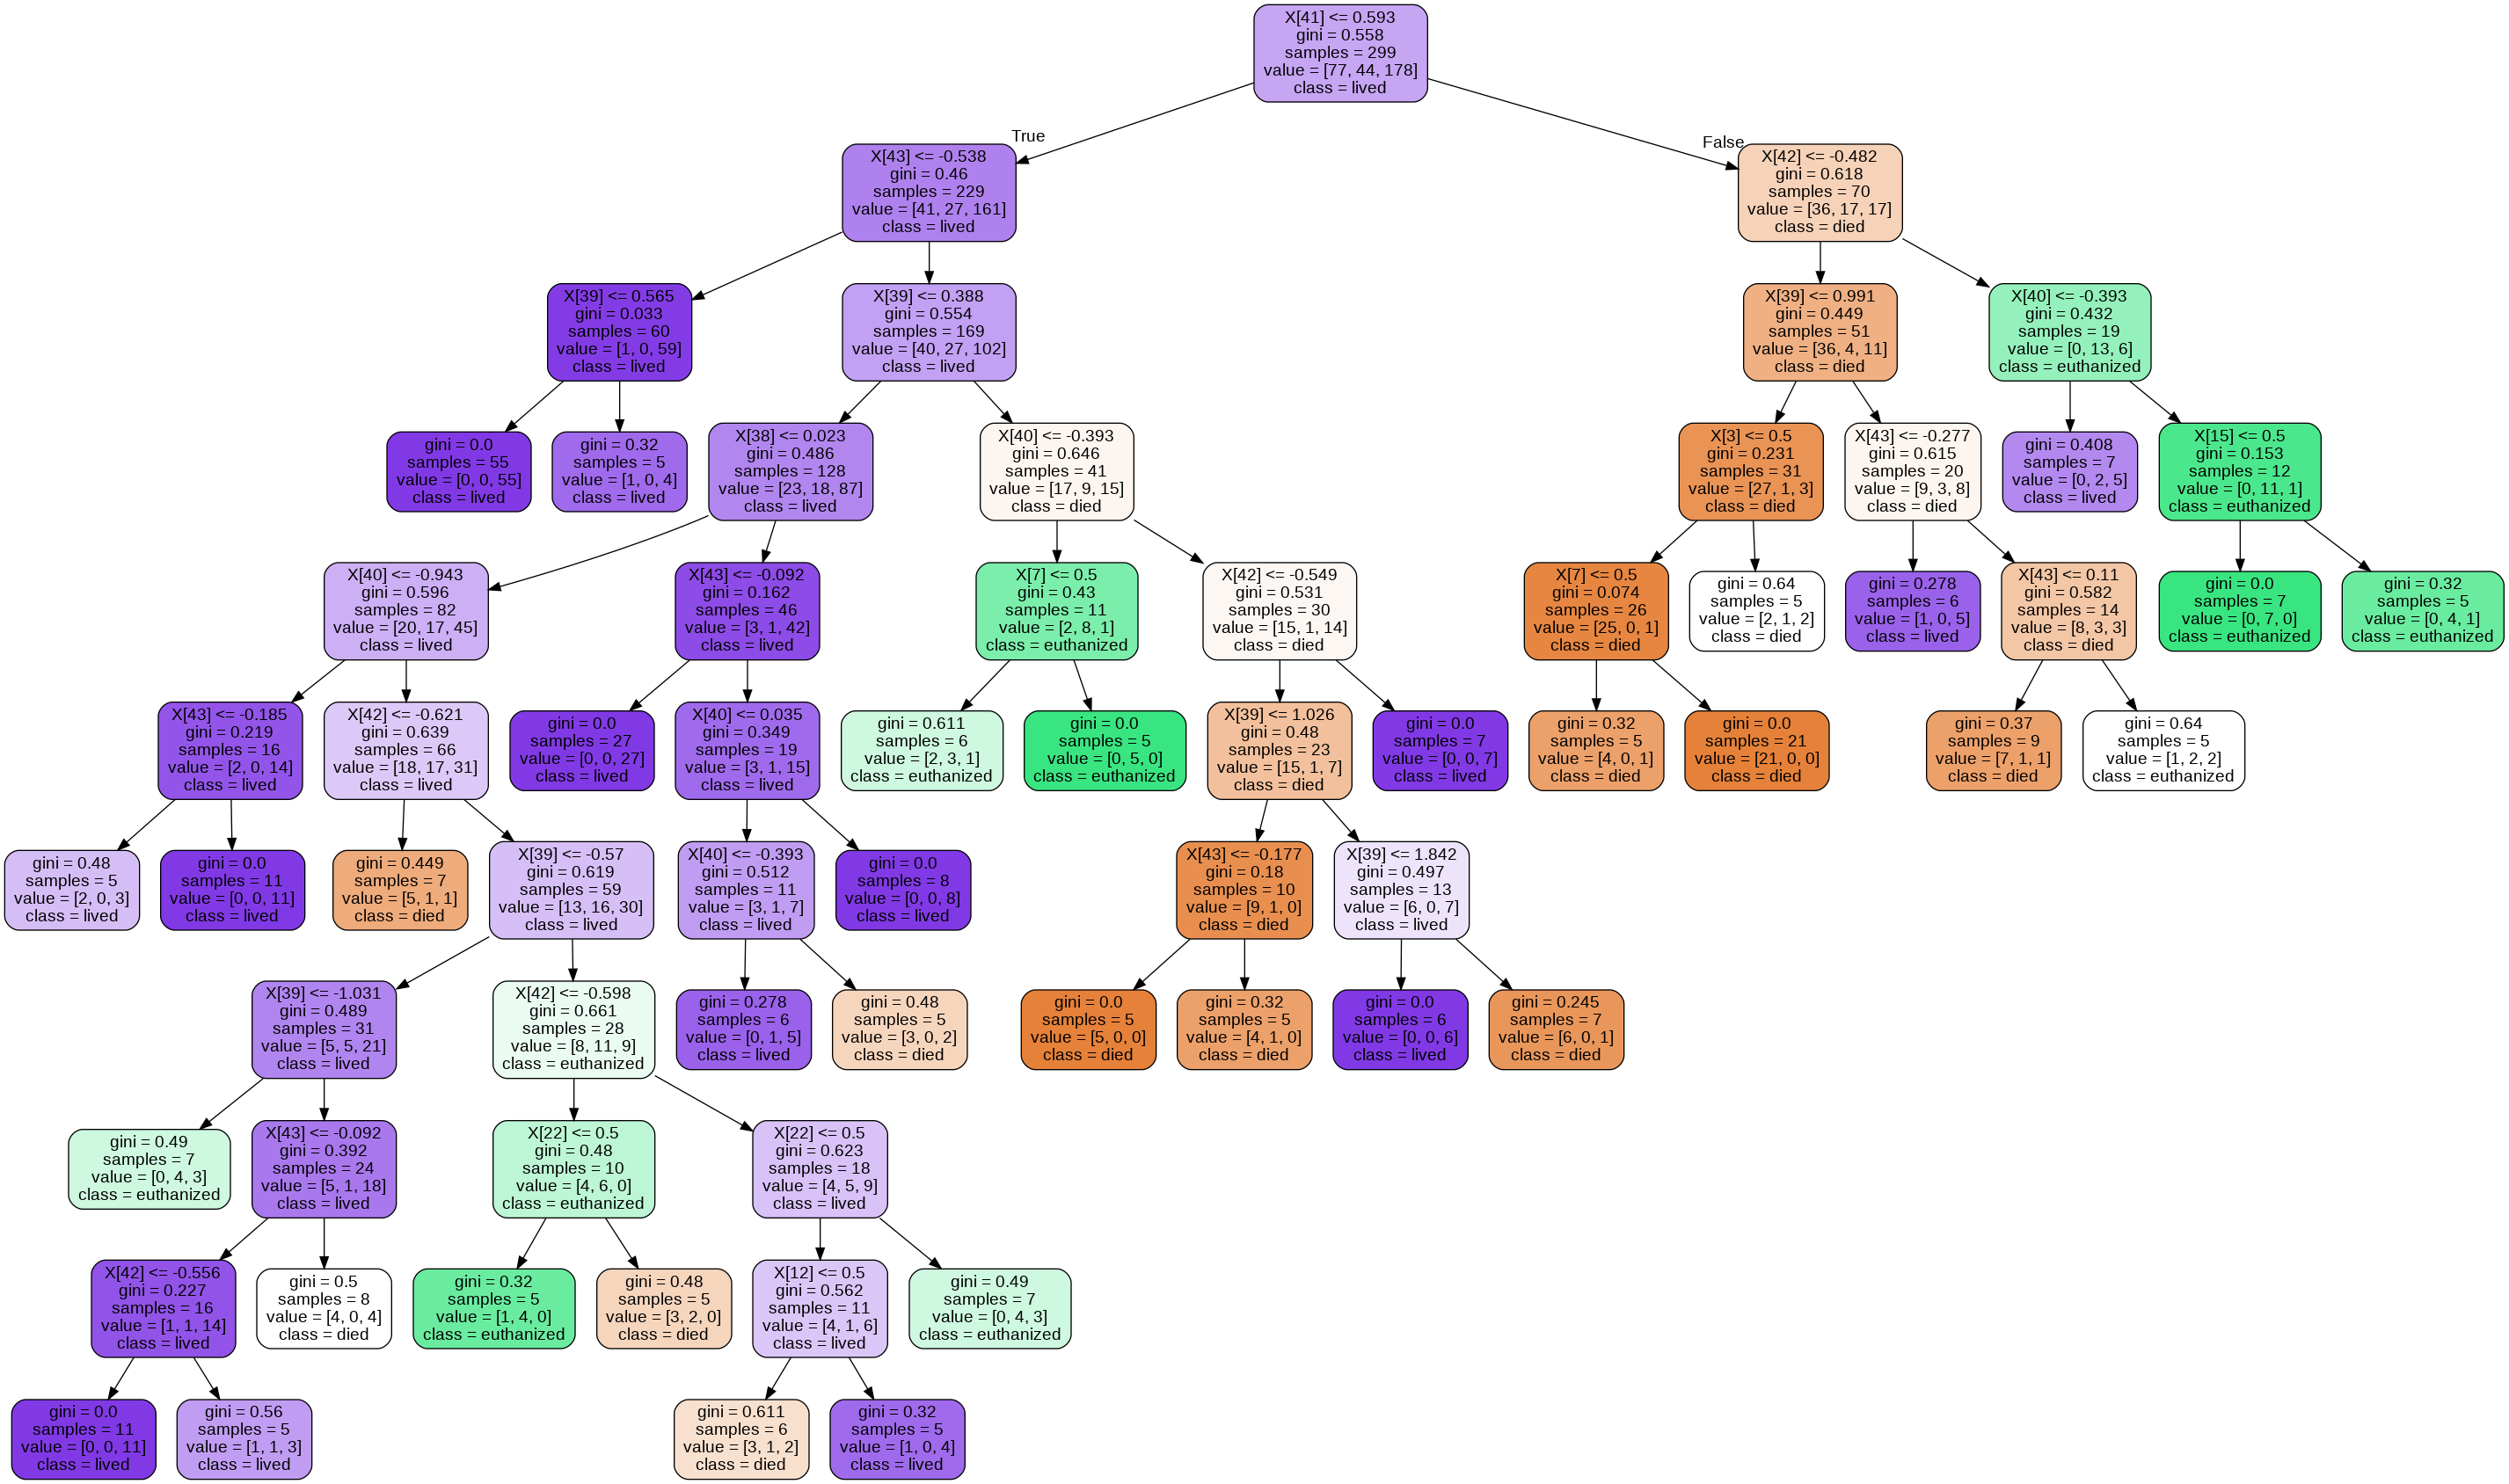

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data_treino = export_graphviz(model_dt, #feature_names=list(pd.DataFrame(X_train).columns.values), 
                           class_names=y_train.unique(), rounded=True, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data_treino)
Image(graph.create_png())

Avaliando o modelo:

In [ ]:
def predict_and_evaluate(model, X_teste, y_teste):

  y_pred = model.predict(X_teste) #inferência do teste

  # Acurácia
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_teste, y_pred)
  print('Acurácia: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_teste, y_pred)
  print('Kappa: ', kappa)

  # f1_score
  from sklearn.metrics import f1_score
  f1_score = f1_score(y_teste, y_pred, average='weighted')
  print('f1_score: ', f1_score)

  # Matriz de confusão
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_pred, y_teste, labels = ['died', 'lived','euthanized'])

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True)
  plt.xlabel('Real')
  plt.ylabel('Previsto')
  plt.title('Matriz de Confusão')
  
  # Colocar os nomes
  ax.xaxis.set_ticklabels(['died', 'lived','euthanized']) 
  ax.yaxis.set_ticklabels(['died', 'lived','euthanized'])

  plt.show()

In [ ]:
y_teste.unique()

array(['died', 'lived', 'euthanized'], dtype=object)

Acurácia:  0.8089887640449438
Kappa:  0.6742032730404823
f1_score:  0.8162260455144865


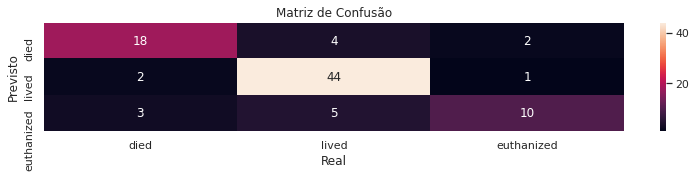

In [ ]:
predict_and_evaluate(model_dt, X_teste, y_teste)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Parâmetros a serem testados
tuned_parameters = [{'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'min_samples_leaf' : [5, 6, 7, 10]}]

print("# Tuning hyper-parâmetros parar F1 score")
print()

model = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='f1_weighted')
model.fit(X_train, y_train)

y_pred = model.predict(X_teste)
print(classification_report(y_teste, y_pred))
print("Parâmetros que retornaram um melhor f1_score:")
print(model.best_params_)

# Tuning hyper-parâmetros parar F1 score

              precision    recall  f1-score   support

        died       0.75      0.78      0.77        23
  euthanized       0.56      0.77      0.65        13
       lived       0.94      0.83      0.88        53

    accuracy                           0.81        89
   macro avg       0.75      0.79      0.76        89
weighted avg       0.83      0.81      0.82        89

Parâmetros que retornaram um melhor f1_score:
{'criterion': 'gini', 'min_samples_leaf': 5, 'splitter': 'best'}


### B) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state=seed)
model_rf  = rf.fit(X_train, y_train);

Acurácia:  1.0
Kappa:  1.0
f1_score:  1.0


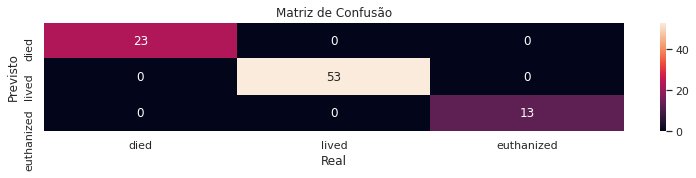

In [ ]:
  y_pred = model_rf.predict(X_teste) #inferência do teste
  predict_and_evaluate(model_rf, X_teste, y_teste)

Checando se houve overfitting:

In [ ]:
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_validate
scoring = ['accuracy', 'f1_macro']
scores = cross_validate(model_rf, X_train, y_train, cv=5, scoring = scoring)

In [ ]:
scores

{'fit_time': array([0.16245103, 0.15372205, 0.15907001, 0.16321802, 0.17010236]),
 'score_time': array([0.01115656, 0.01074481, 0.01094174, 0.01072431, 0.01138997]),
 'test_accuracy': array([0.65      , 0.66666667, 0.7       , 0.66666667, 0.74576271]),
 'test_f1_macro': array([0.42369478, 0.50106698, 0.53826626, 0.50784632, 0.58028208])}

As métricas obtidas no processo de cross validation indicam que pode haver overfitting!!!
Para confirmar se de fato é isto que está ocorrendo, necessitamos de mais dados.

### C) Catboost

Instalando biblioteca:

In [ ]:
!pip install CatBoost -q

In [ ]:
from catboost import CatBoostClassifier
model_cb = CatBoostClassifier()
model_cb.fit(X_train, y_train, plot=True, eval_set=(X_teste, y_teste))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.1054
0:	learn: 1.0483158	test: 1.0494825	best: 1.0494825 (0)	total: 53.3ms	remaining: 53.3s
1:	learn: 1.0062975	test: 1.0104131	best: 1.0104131 (1)	total: 58.2ms	remaining: 29.1s
2:	learn: 0.9655791	test: 0.9681655	best: 0.9681655 (2)	total: 62.9ms	remaining: 20.9s
3:	learn: 0.9330191	test: 0.9341109	best: 0.9341109 (3)	total: 68.6ms	remaining: 17.1s
4:	learn: 0.9031710	test: 0.9010703	best: 0.9010703 (4)	total: 73.2ms	remaining: 14.6s
5:	learn: 0.8836505	test: 0.8821490	best: 0.8821490 (5)	total: 74.2ms	remaining: 12.3s
6:	learn: 0.8588238	test: 0.8570956	best: 0.8570956 (6)	total: 78.7ms	remaining: 11.2s
7:	learn: 0.8373432	test: 0.8375746	best: 0.8375746 (7)	total: 83.4ms	remaining: 10.3s
8:	learn: 0.8137018	test: 0.8131518	best: 0.8131518 (8)	total: 88ms	remaining: 9.69s
9:	learn: 0.7995239	test: 0.8001500	best: 0.8001500 (9)	total: 92.6ms	remaining: 9.17s
10:	learn: 0.7831278	test: 0.7843550	best: 0.7843550 (10)	total: 97.1ms	remaining: 8.73s
11:	learn: 0.76

Inferência do teste:

Acurácia:  1.0
Kappa:  1.0
f1_score:  1.0


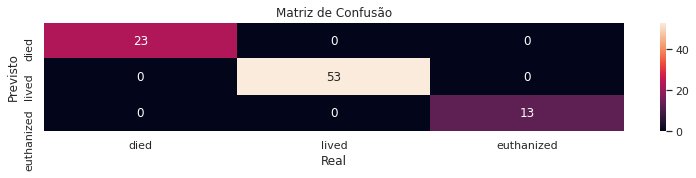

In [ ]:
y_pred_cb = model_cb.predict(X_teste)
predict_and_evaluate(model_cb, X_teste, y_teste)

Checando se houve overfitting:

In [ ]:
scoring = ['accuracy', 'f1_macro']
scores = cross_validate(model_cb, X_train, y_train, cv=5, scoring = scoring)

A saída de streaming foi truncada nas últimas 5000 linhas.
4:	learn: 0.9564125	total: 24ms	remaining: 4.78s
5:	learn: 0.9368157	total: 25.2ms	remaining: 4.17s
6:	learn: 0.9134255	total: 29.8ms	remaining: 4.23s
7:	learn: 0.8954398	total: 34.8ms	remaining: 4.31s
8:	learn: 0.8764463	total: 39.4ms	remaining: 4.34s
9:	learn: 0.8596433	total: 44.3ms	remaining: 4.38s
10:	learn: 0.8461988	total: 49.2ms	remaining: 4.43s
11:	learn: 0.8310318	total: 54.1ms	remaining: 4.45s
12:	learn: 0.8162784	total: 58.9ms	remaining: 4.47s
13:	learn: 0.8034277	total: 63.6ms	remaining: 4.48s
14:	learn: 0.7908494	total: 68.4ms	remaining: 4.49s
15:	learn: 0.7771850	total: 73.2ms	remaining: 4.5s
16:	learn: 0.7641069	total: 78.2ms	remaining: 4.52s
17:	learn: 0.7548940	total: 83ms	remaining: 4.53s
18:	learn: 0.7404817	total: 87.5ms	remaining: 4.52s
19:	learn: 0.7303706	total: 92.2ms	remaining: 4.52s
20:	learn: 0.7202230	total: 96.8ms	remaining: 4.51s
21:	learn: 0.7109714	total: 101ms	remaining: 4.51s
22:	learn: 0.6990

In [ ]:
scores

{'fit_time': array([5.51767397, 5.46713185, 5.59412646, 5.74982953, 5.70617938]),
 'score_time': array([0.00498915, 0.0050745 , 0.00520873, 0.00918388, 0.00581717]),
 'test_accuracy': array([0.68333333, 0.66666667, 0.65      , 0.7       , 0.69491525]),
 'test_f1_macro': array([0.44268078, 0.52575653, 0.53044733, 0.5953903 , 0.52900433])}

## Estratégia 2:

* substituir missings numericos pela média
* substituir missings categoricos pelo mais frequente
* normalização standart scaler
* PCA (redução de dimensionalidade)


In [ ]:
X_train_numerica2= data_treino[numericas]
X_teste_numerica2 = data_teste[numericas]

Substituindo missings nas colunas numéricas

In [ ]:
imputer = SimpleImputer(strategy="mean")
imputer.fit(X_train_numerica2)
X_train_numerica2  = imputer.transform(X_train_numerica2)
X_teste_numerica2  = imputer.transform(X_teste_numerica2)

In [ ]:
X_train_numerica2 = pd.DataFrame(X_train_numerica2, columns= numericas)
X_teste_numerica2 = pd.DataFrame(X_teste_numerica2, columns= numericas)

Normalizando as colunas que contém dados numéricos:

In [ ]:
scaler = StandardScaler().fit(X_train_numerica2)
X_train_numerica2 = scaler.transform(X_train_numerica2)
X_teste_numerica2 = scaler.transform(X_teste_numerica2)

In [ ]:
X_train_numerica2 = pd.DataFrame(X_train_numerica2, columns= numericas)
X_teste_numerica2 = pd.DataFrame(X_teste_numerica2, columns= numericas)

In [ ]:
X_train2 = pd.concat([ohe_X_train_categorica, X_train_numerica2], axis=1)
X_teste2 = pd.concat([ohe_X_teste_categorica, X_teste_numerica2], axis=1)

PCA:

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=22).fit(X_train2)
X_train_pca = pd.DataFrame(pca.transform(X_train2))
X_test_pca = pd.DataFrame(pca.transform(X_teste2))

In [ ]:
X_test_pca.head()

0         1         2   ...        19        20        21
0  1.736018 -1.553905  1.139105  ... -0.123676 -0.189711  0.128987
1  0.920785  0.899209 -0.864761  ...  0.076580 -0.379182 -0.301211
2 -1.725202 -0.368410  1.428694  ... -0.122613 -0.312423 -0.152972
3 -0.484580  0.416579  0.183519  ... -0.405358  0.456238  0.433048
4 -0.909990  0.340714  1.049082  ...  0.261996  0.087060 -0.253503

[5 rows x 22 columns]

### A) Árvore de Decisão

Treinando Decision Tree

In [ ]:
model_dt.fit(X_train_pca, y_train);

Avaliando o modelo:

Acurácia:  0.8426966292134831
Kappa:  0.7125057683433318
f1_score:  0.8418828801263603


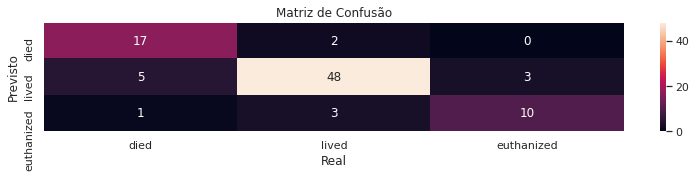

In [ ]:
predict_and_evaluate(model_dt, X_test_pca, y_teste)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_dt, X_train_pca, y_train, cv=5, scoring='f1_macro')

In [ ]:
scores

array([0.47726569, 0.40344654, 0.52104933, 0.45394517, 0.39450848])

### B) SVM

Acurácia:  0.7865168539325843
Kappa:  0.5996685606060606
f1_score:  0.771080773581407


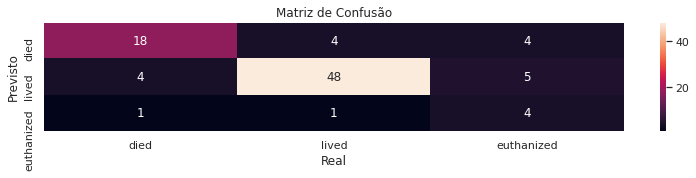

In [ ]:
from sklearn import svm
model_svm = svm.SVC(kernel='linear', gamma= 'scale')
model_svm.fit(X_train_pca, y_train)
predict_and_evaluate(model_svm, X_test_pca, y_teste)

Parâmetros a serem testados : Grid Search:

In [ ]:
tuned_parameters = [{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto']}]
print("# Tuning hyper-parâmetros parar F1 score")
print()
model = GridSearchCV(svm.SVC(), tuned_parameters, scoring='f1_weighted')
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
print(classification_report(y_teste, y_pred))
print("Parâmetros que retornaram um melhor f1_score:")
print(model.best_params_)

# Tuning hyper-parâmetros parar F1 score

              precision    recall  f1-score   support

        died       0.69      0.78      0.73        23
  euthanized       0.67      0.31      0.42        13
       lived       0.84      0.91      0.87        53

    accuracy                           0.79        89
   macro avg       0.73      0.67      0.68        89
weighted avg       0.78      0.79      0.77        89

Parâmetros que retornaram um melhor f1_score:
{'gamma': 'scale', 'kernel': 'linear'}


### C) Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(C=100, multi_class='multinomial', solver='lbfgs', max_iter=1000)
model_lr.fit(X_train_pca,y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = model_lr.predict(X_test_pca)

In [ ]:
y_pred

array(['died', 'lived', 'lived', 'lived', 'lived', 'lived', 'lived',
       'lived', 'died', 'died', 'euthanized', 'euthanized', 'died',
       'lived', 'died', 'died', 'died', 'lived', 'lived', 'lived',
       'lived', 'euthanized', 'died', 'lived', 'died', 'lived', 'lived',
       'lived', 'lived', 'lived', 'lived', 'lived', 'lived', 'lived',
       'lived', 'died', 'lived', 'lived', 'lived', 'lived', 'died',
       'lived', 'lived', 'lived', 'died', 'lived', 'lived', 'lived',
       'lived', 'lived', 'lived', 'lived', 'euthanized', 'euthanized',
       'euthanized', 'lived', 'lived', 'lived', 'euthanized', 'lived',
       'lived', 'lived', 'lived', 'died', 'lived', 'died', 'lived',
       'died', 'lived', 'died', 'lived', 'lived', 'lived', 'died',
       'lived', 'died', 'lived', 'lived', 'lived', 'lived', 'died',
       'lived', 'lived', 'died', 'lived', 'lived', 'died', 'died', 'died'],
      dtype=object)

Acurácia:  0.7865168539325843
Kappa:  0.5948730234786777
f1_score:  0.774478330658106


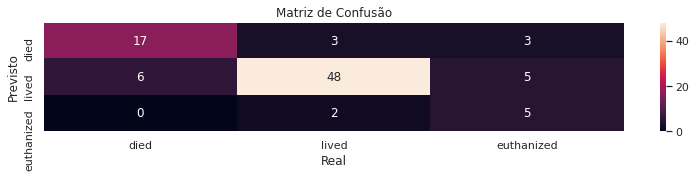

In [ ]:
predict_and_evaluate(model_lr, X_test_pca, y_teste)

## Estratégia 3
* tratamento de missings como em Estratégia 2
* normalização standart scaler
* oversampling aleatório

In [ ]:
X_train2 = pd.concat([ohe_X_train_categorica, X_train_numerica2], axis=1)
X_teste2 = pd.concat([ohe_X_teste_categorica, X_teste_numerica2], axis=1)

In [ ]:
!pip install imbalanced-learn -q

In [ ]:
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [ ]:
X_over, y_over = oversample.fit_resample(X_train2, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### A) Regressão Logística

In [ ]:
model_lr.fit(X_over,y_over)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = model_lr.predict(X_teste2)
y_pred

array(['euthanized', 'lived', 'lived', 'lived', 'lived', 'lived', 'lived',
       'lived', 'euthanized', 'euthanized', 'euthanized', 'euthanized',
       'died', 'lived', 'died', 'died', 'euthanized', 'lived', 'lived',
       'lived', 'euthanized', 'euthanized', 'died', 'lived', 'died',
       'lived', 'lived', 'lived', 'lived', 'lived', 'lived', 'lived',
       'lived', 'lived', 'died', 'died', 'lived', 'euthanized', 'lived',
       'lived', 'died', 'euthanized', 'lived', 'euthanized', 'died',
       'lived', 'lived', 'lived', 'lived', 'lived', 'lived', 'euthanized',
       'euthanized', 'euthanized', 'euthanized', 'lived', 'lived',
       'lived', 'euthanized', 'died', 'lived', 'lived', 'lived', 'died',
       'lived', 'died', 'lived', 'euthanized', 'lived', 'euthanized',
       'lived', 'died', 'lived', 'lived', 'lived', 'died', 'lived',
       'lived', 'lived', 'lived', 'died', 'lived', 'lived', 'euthanized',
       'lived', 'lived', 'died', 'died', 'euthanized'], dtype=object)

Acurácia:  0.797752808988764
Kappa:  0.6451041205139566
f1_score:  0.8057006663748235


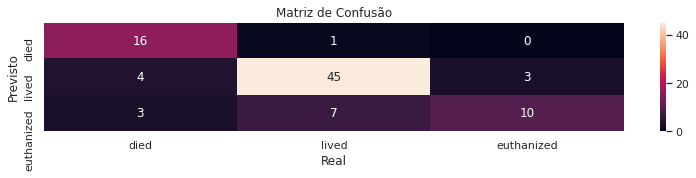

In [ ]:
predict_and_evaluate(model_lr, X_teste2, y_teste)

# Conclusão e Resumo

Este trabalho objetivou definir um modelo preditivo que fosse confiável ao inferir novos "cavalos" para avaliar se o mesmo, dado seu histórico de doença e saúde, morreria, sobreviveria ou deveria sofrer eutanásia.<br/>
Pelo caso possuir saídas conhecidas,  foram utilizados algoritmos de Machine Learning supervisionados (onde o rótulo é conhecido).<br/>
A ordem do trabalho seguiu com a Análise Exploratória, seguido do Pré-processamento da base de treino, onde foi possível analisar os atributos mais relevantes para definição e comparação de modelos preditivos e criar certa intimidade com os dados e a correlação entre os atributos.<br/>
A metodologia baseou-se em 3 estratégias a seguir:<br/>


**Estratégia 1**: *tratar missing substituindo valores faltantes por valor mais frequente na coluna correspondente e normalização standard scaler*<br/>
3 algoritmos de Machine Learning foram utilizados e seus resultados expostos com suas respectivas medidas de acurácia calculadas para futura comparação.<br/> 
**1A) Árvore de Decisão** com os seguintes resultados atingidos:<br/>
* Acurácia:  0.8089887640449438
* Kappa:  0.6742032730404823
* f1_score:  0.8162260455144865
<br/> 

**1B) Random Forest** com os seguintes resultados atingidos (indicando possível overfiting):<br/>
* Acurácia: 1.0
* Kappa: 1.0
* f1_score: 1.0
<br/>

**1C) Catboost** com os seguintes resultados atingidos (indicando possível overfiting):<br/>
* Acurácia: 1.0
* Kappa: 1.0
* f1_score: 1.0
<br/>

**Estratégia 2**: *substituir missings numericos pela média, 
substituir missings categoricos pelo mais frequente, normalização standart scaler e
PCA (redução de dimensionalidade)*<br/>
3 algoritmos de Machine Learning foram utilizados e seus resultados expostos com suas respectivas medidas de acurácia calculadas para futura comparação.<br/> 
**2A) Árvore de Decisão** com os seguintes resultados atingidos:<br/>
* Acurácia:  0.8426966292134831
* Kappa:  0.7125057683433318
* f1_score:  0.8418828801263603
<br/> 

**2B) SVM** com os seguintes resultados atingidos:<br/>
* Acurácia:  0.7865168539325843
* Kappa:  0.5996685606060606
* f1_score:  0.771080773581407
<br/>

**2C) Regressão Logística** com os seguintes resultados atingidos:<br/>
* Acurácia:  0.7865168539325843
* Kappa:  0.5948730234786777
* f1_score:  0.774478330658106
<br/>

**Estratégia 3**: *tratamento de missings como na Estratégia 2, normalização standard scaler e
oversampling aleatório*<br/>
1 algoritmo de Machine Learning foi utilizado e seu resultado foi expostos com suas respectivas medidas de acurácia calculadas para futura comparação.<br/> 
**3A) Regressão Logística** com os seguintes resultados atingidos:<br/>
* Acurácia:  0.8426966292134831
* Kappa:  0.7293657688966116
* f1_score:  0.84803444146502
<br/> 

Chegou-se a seguinte conclusão:

* A Estratégia que apresentou melhores resultados foi a 3A, com o método de Regressão Linear, normalização standart scaler e oversampling aleatório.
* As Estratégias 1B e 1C, apesar de indicarem 100% de em seus índice de confiança indicam um possível overfiting.